In [1]:
import pandas as pd
import numpy as np
import anndata as ad
from random import sample
from math import ceil
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt
from SpatialDE import spatial_patterns, SpatialPatternParameters

In [2]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/MOFA10/eqtl_tot_genetic_effect_all.txt"
df = pd.read_csv(filename, sep = "\t", index_col=0)
df.head()

,ENSG00000005059_CCDC109B_-4_110648632_T_A,ENSG00000006016_CRLF1_-19_18735221_G_T,ENSG00000006459_KDM7A_-7_139913409_G_A,ENSG00000013297_CLDN11_-3_170402765_T_C,ENSG00000021300_PLEKHB1_-11_73339784_G_A,ENSG00000029639_TFB1M_-6_155635808_C_G,ENSG00000033178_UBA6_-4_68480525_C_T,ENSG00000035115_SH3YL1_-2_256116_G_T,ENSG00000059377_TBXAS1_-7_139547370_G_A,ENSG00000063761_ADCK1_-14_78311319_G_A,...,ENSG00000248098_BCKDHA_-19_41937095_G_A,ENSG00000248124_RRN3P1_-16_21818292_A_C,ENSG00000250317_SMIM20_-4_25918516_A_G,ENSG00000253203_GUSBP3_-5_68922087_T_G,ENSG00000254184_TYW1B_-7_72200923_G_A,ENSG00000256018_HIST1H3G_-6_26198845_G_C,ENSG00000256073_C21orf119_-21_33728588_C_A,ENSG00000259024_TVP23C-CDRT4_-17_15434991_C_T,ENSG00000259803_SLC22A31_-16_89234110_G_C,ENSG00000267323_SLC25A1P5_-19_28298186_T_C
21843_1#10,-0.023362,0.037167,-0.029628,0.182970,-0.037939,-0.029324,0.031399,-0.039623,0.080138,0.027498,...,-0.081858,-0.108624,-0.103176,-0.048543,0.095112,-0.002571,-0.055608,0.193125,-0.061681,0.054686
21843_1#100,-0.047974,-0.002568,-0.050304,0.142045,-0.064256,-0.017894,-0.064684,-0.088204,0.232739,0.040376,...,-0.161335,-0.455718,-0.098590,-0.095641,0.007662,-0.001387,-0.094119,0.261424,-0.162714,-0.037052
21843_1#101,-0.017072,-0.038324,0.001072,0.050680,-0.042117,-0.028164,-0.079442,-0.058548,0.142455,0.019225,...,-0.084641,-0.229172,-0.086474,-0.027566,0.030433,-0.038523,-0.007152,0.148960,-0.084674,-0.001068
21843_1#102,-0.068498,0.029141,0.006591,0.277722,0.052109,-0.039448,0.002744,-0.087830,0.060839,0.034591,...,-0.054652,-0.093823,-0.124751,-0.009729,0.052762,-0.008943,-0.024299,0.210887,-0.065773,0.020432
21843_1#103,-0.020660,0.017882,-0.019781,0.127132,-0.044320,-0.010911,-0.024408,-0.039310,0.068838,0.009219,...,-0.045432,-0.131286,-0.064919,-0.033262,0.063575,0.044047,-0.037472,0.139206,-0.061607,0.047756


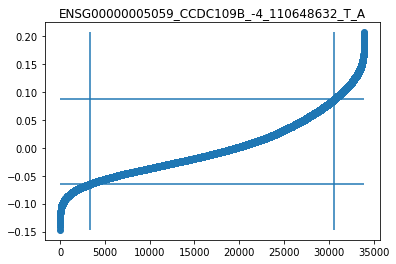

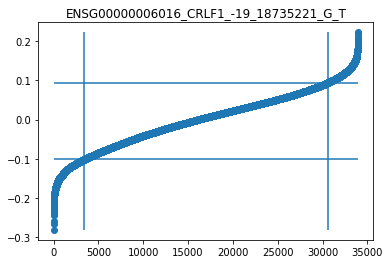

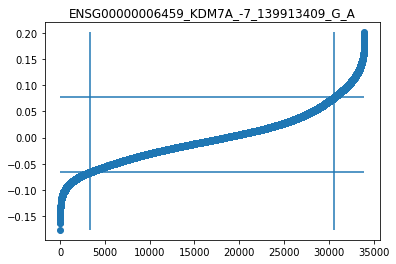

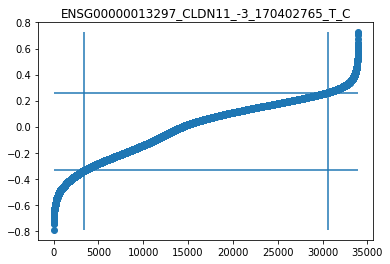

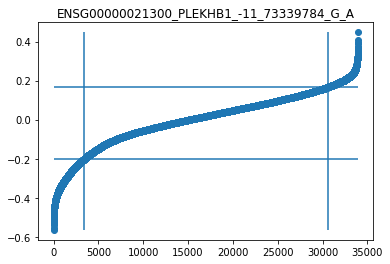

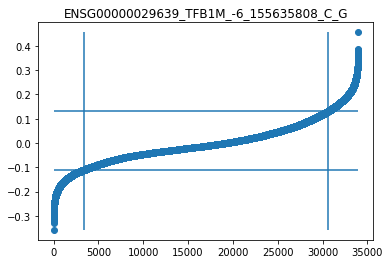

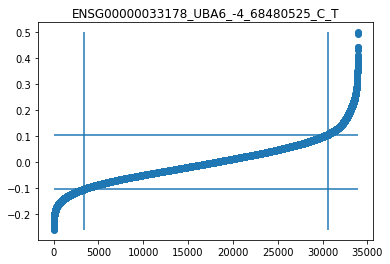

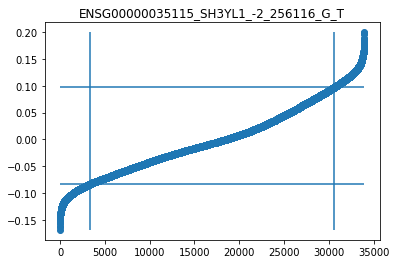

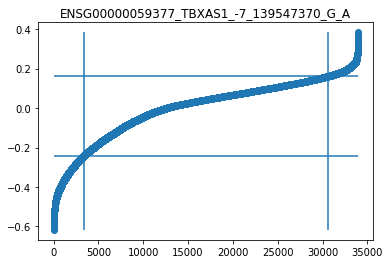

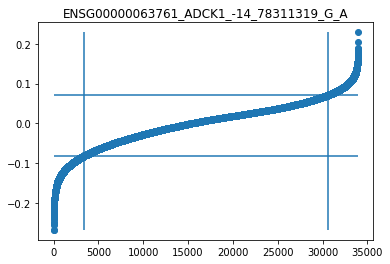

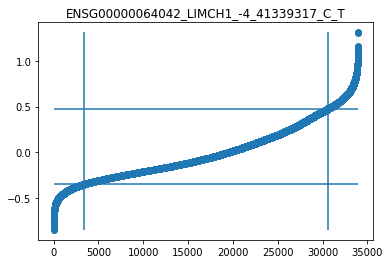

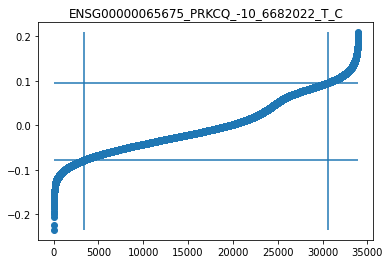

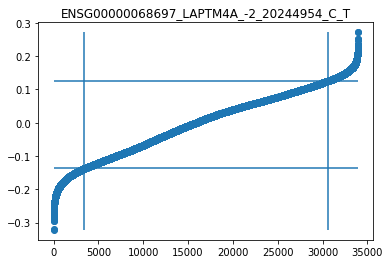

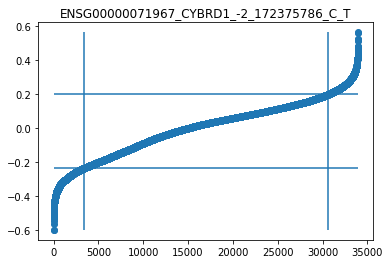

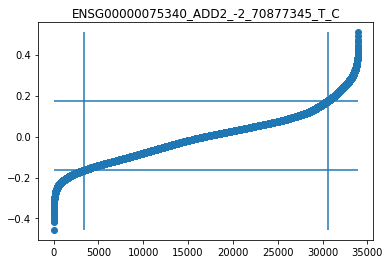

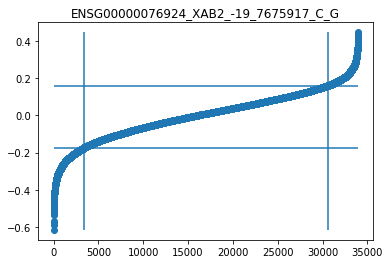

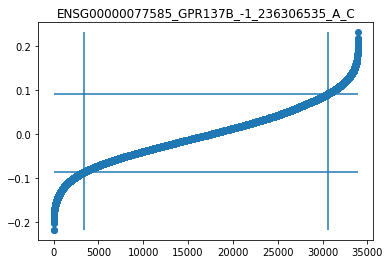

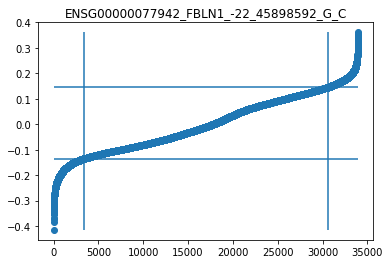

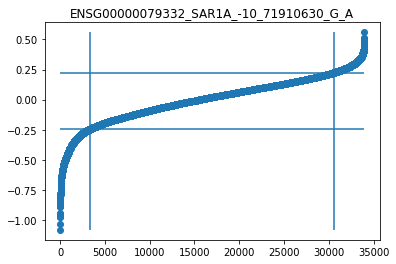

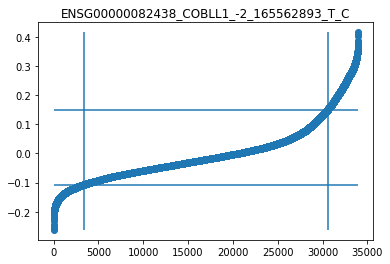

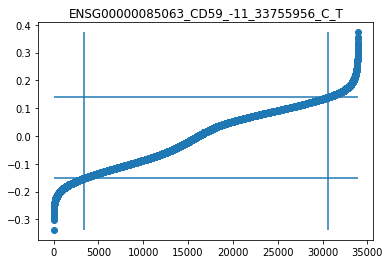

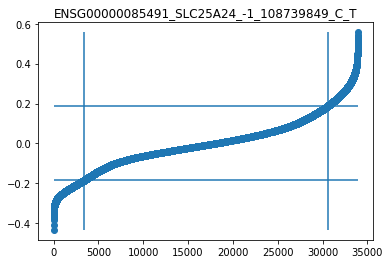

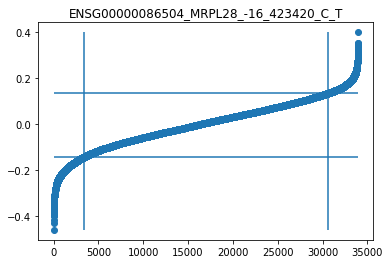

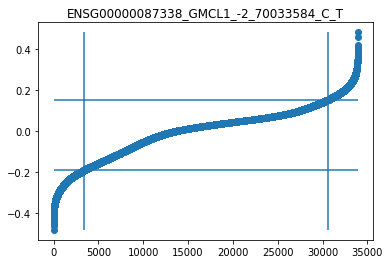

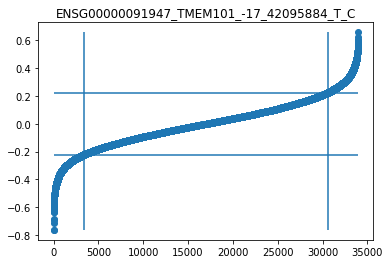

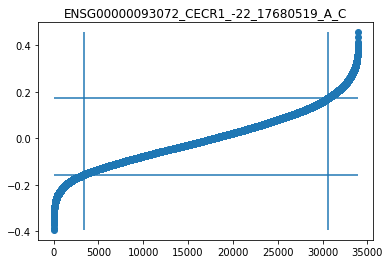

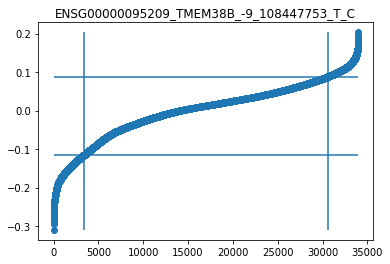

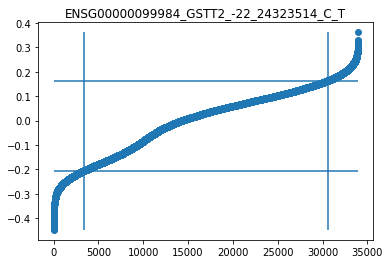

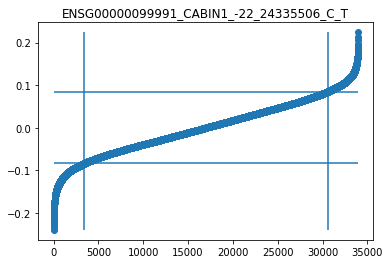

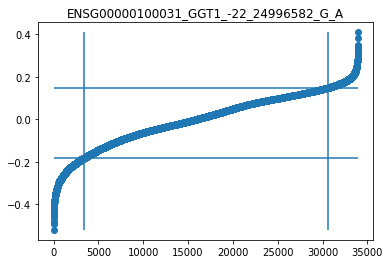

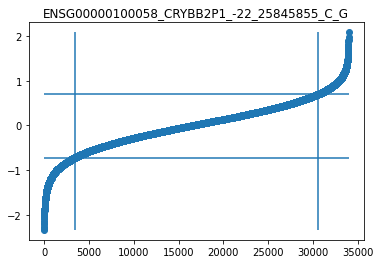

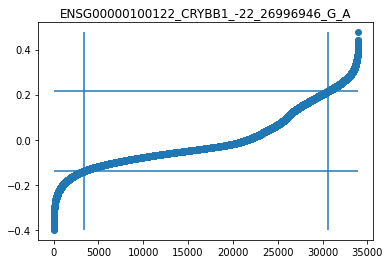

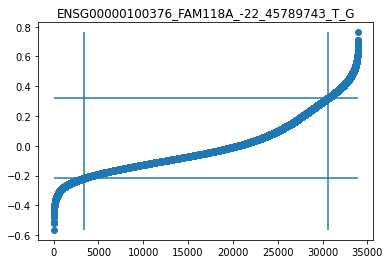

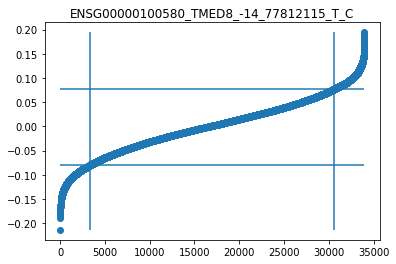

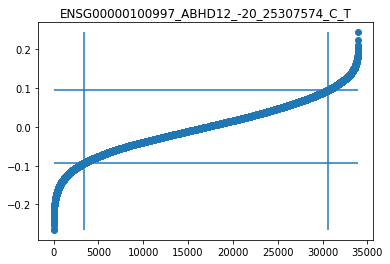

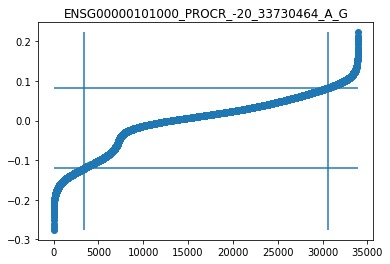

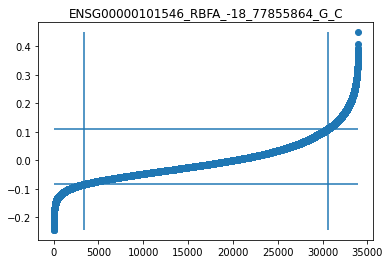

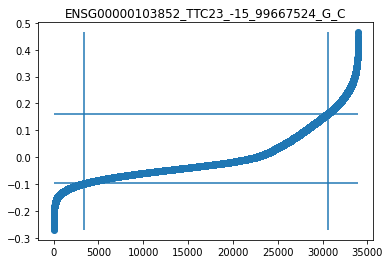

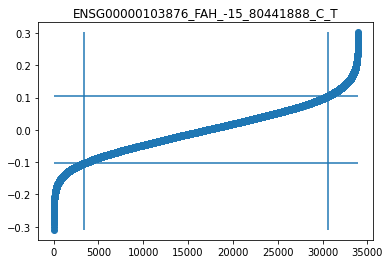

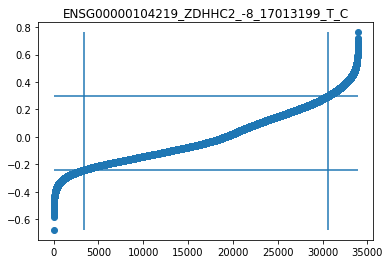

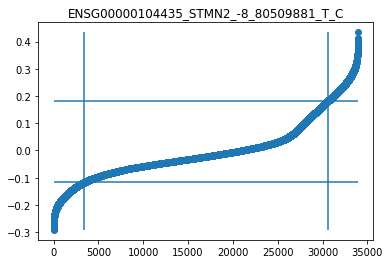

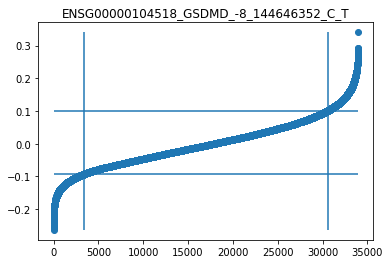

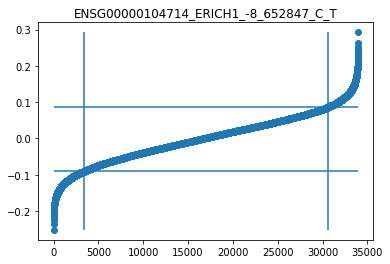

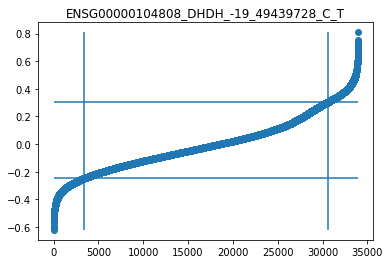

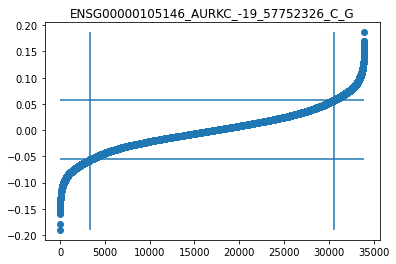

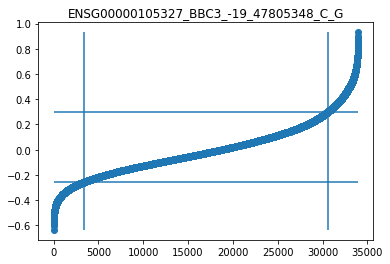

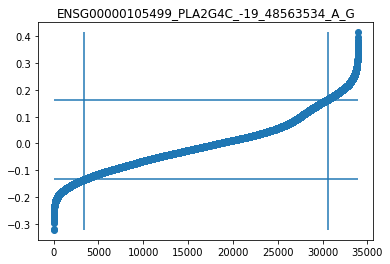

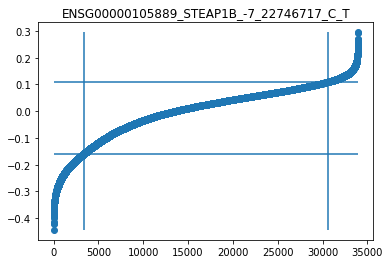

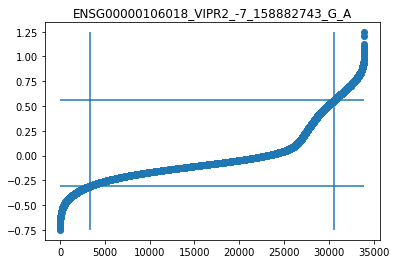

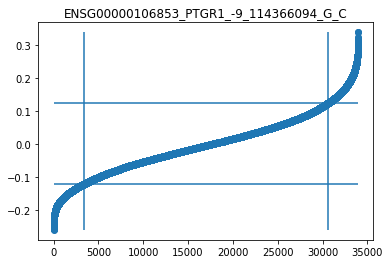

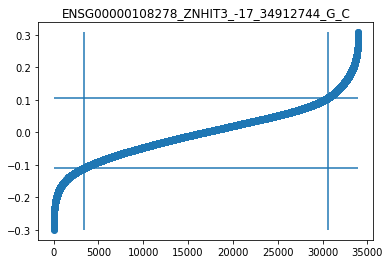

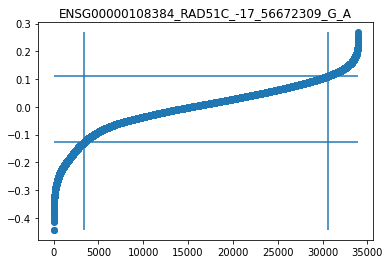

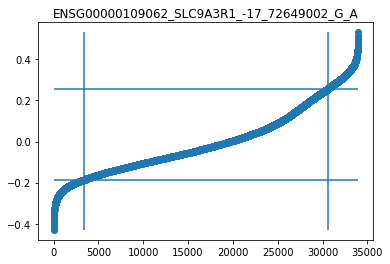

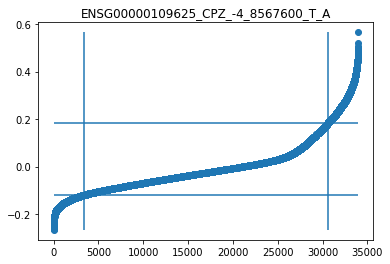

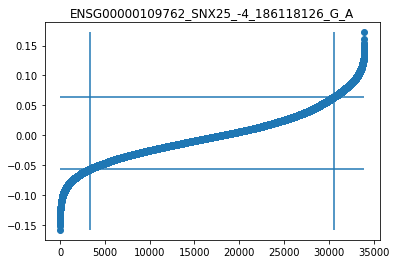

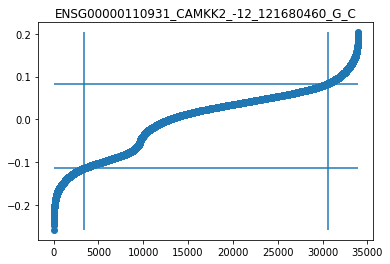

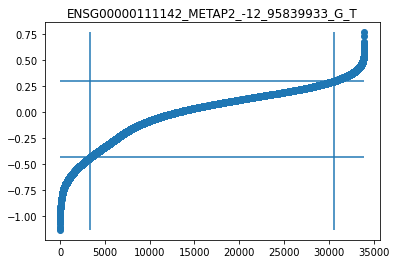

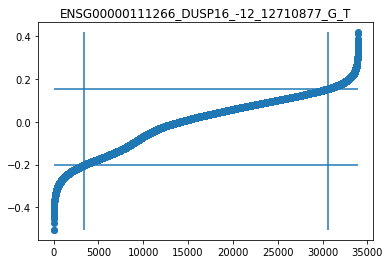

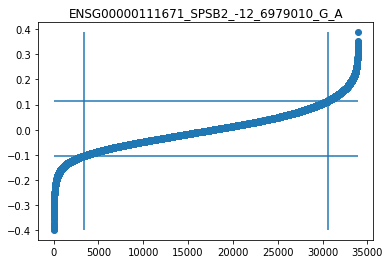

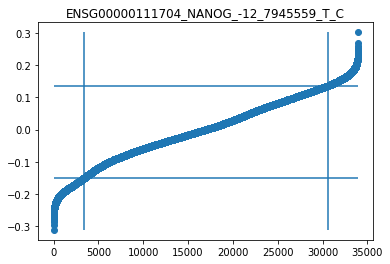

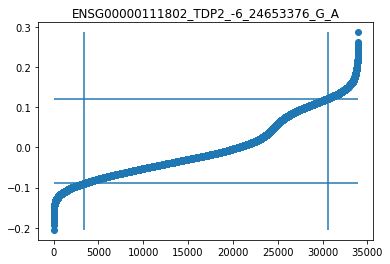

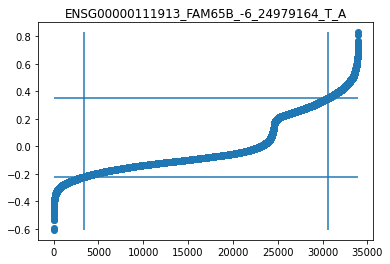

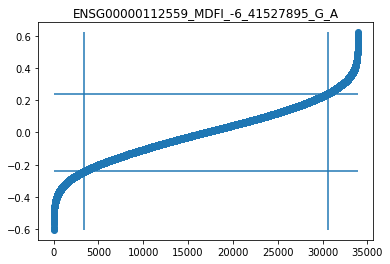

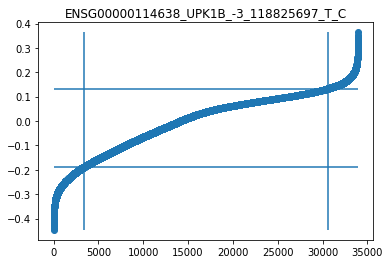

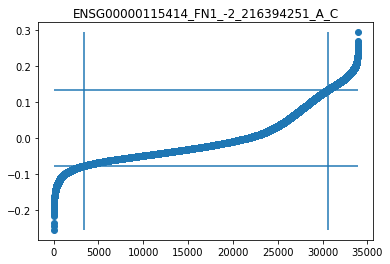

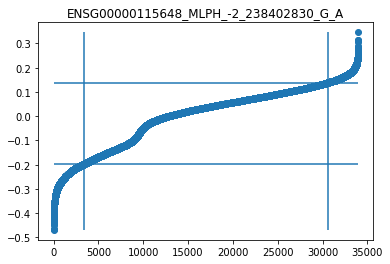

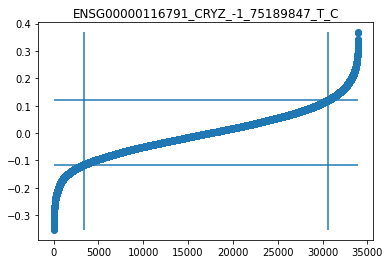

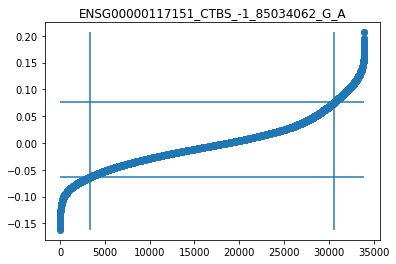

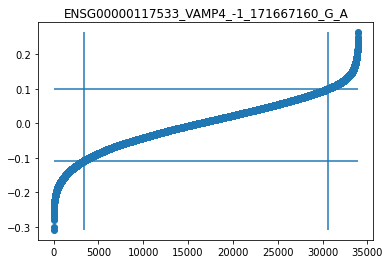

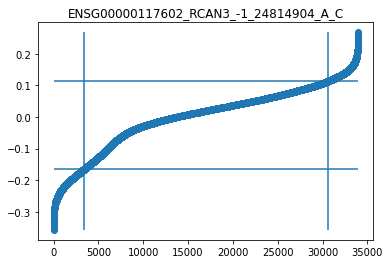

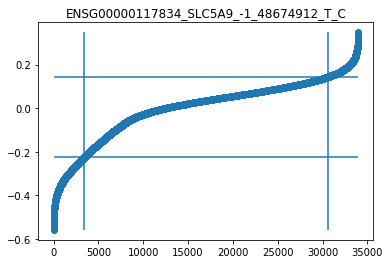

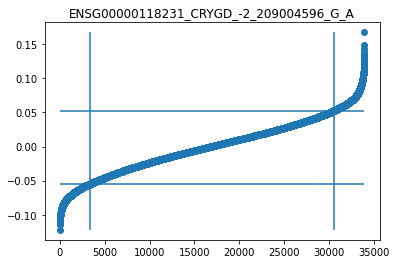

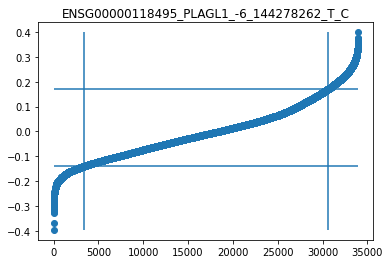

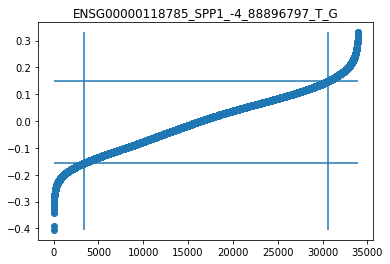

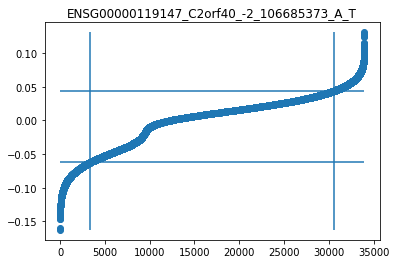

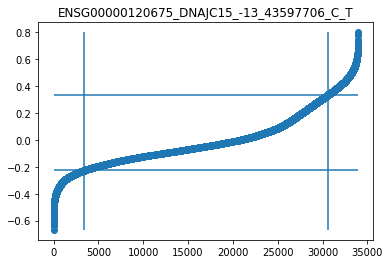

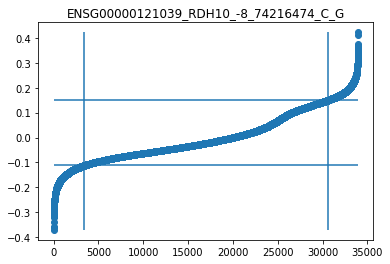

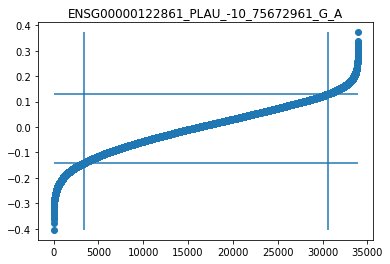

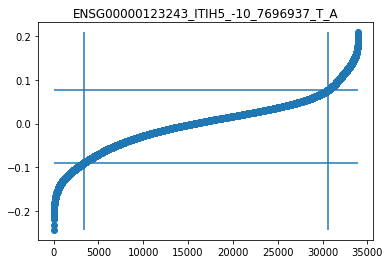

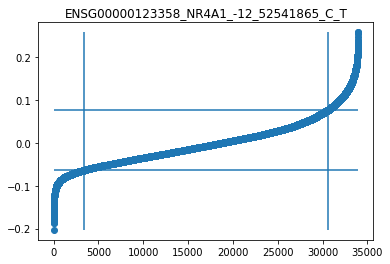

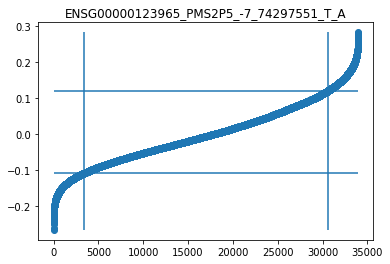

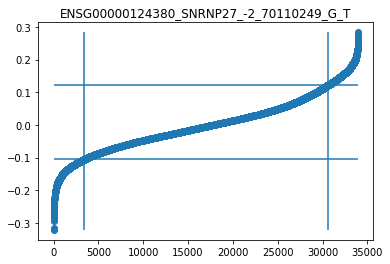

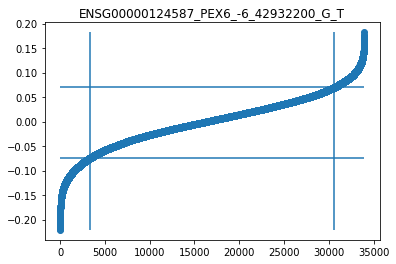

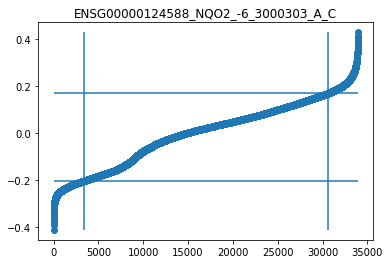

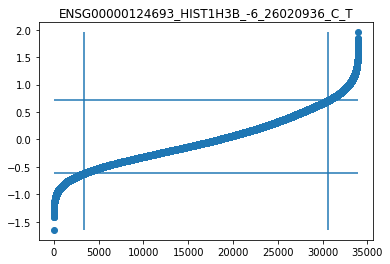

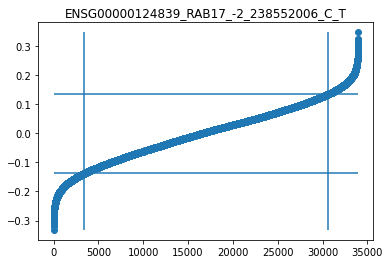

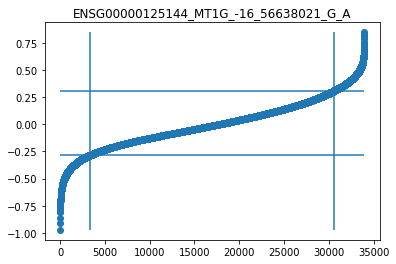

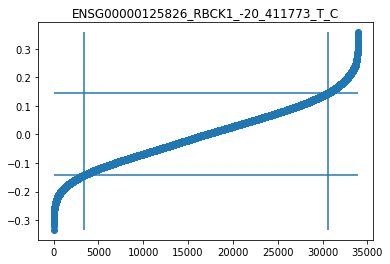

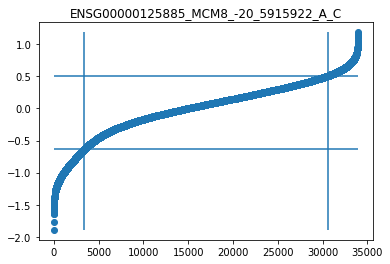

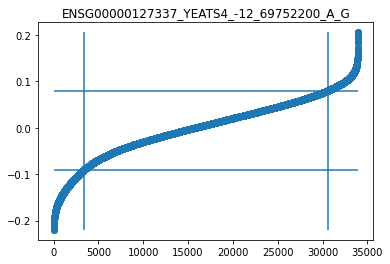

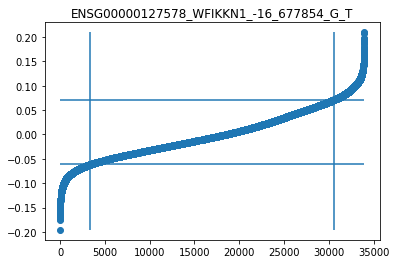

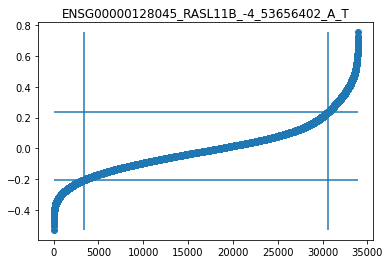

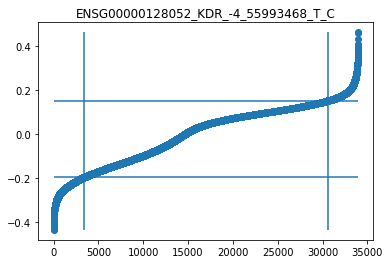

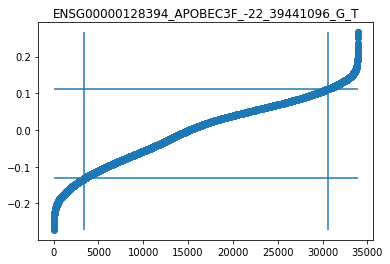

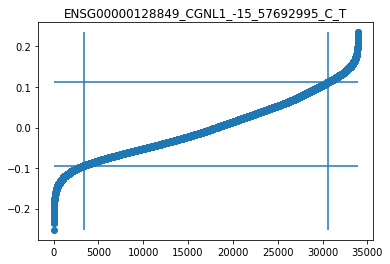

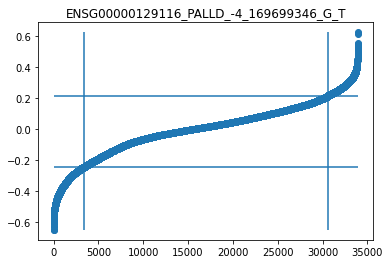

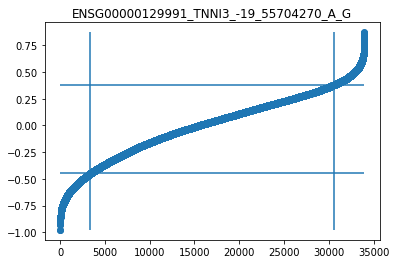

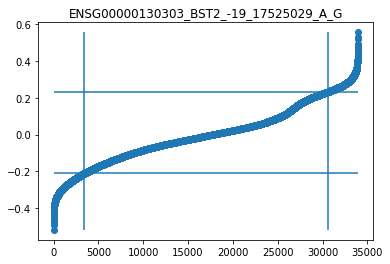

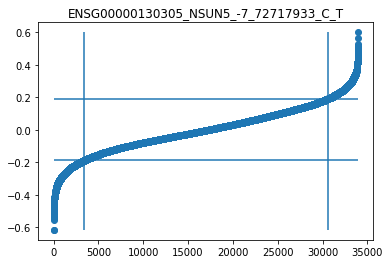

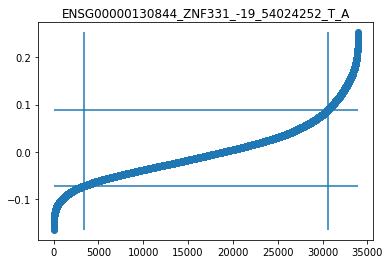

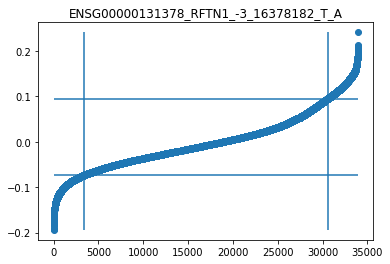

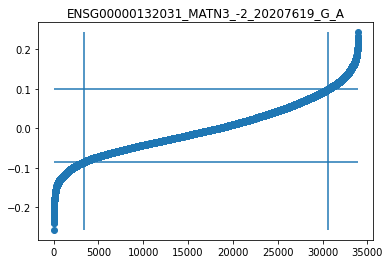

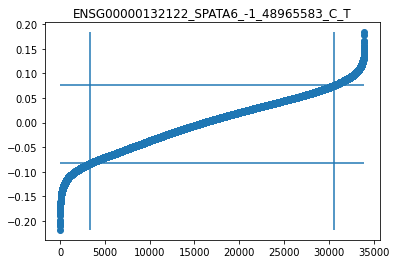

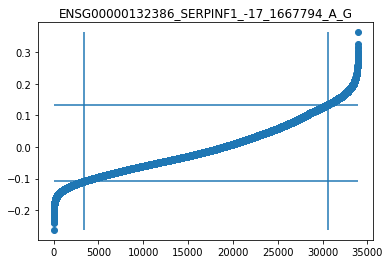

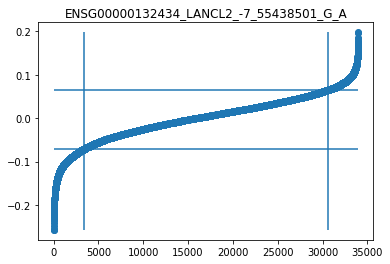

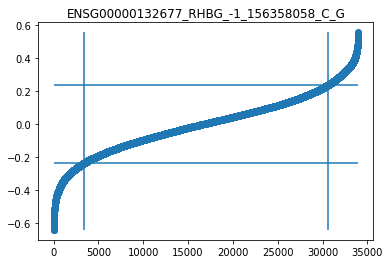

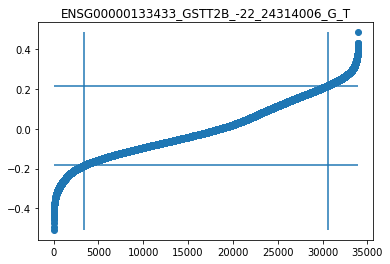

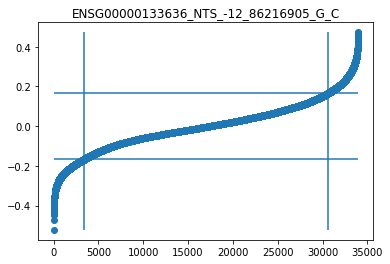

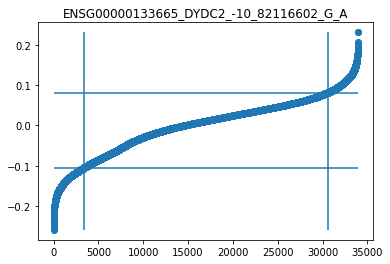

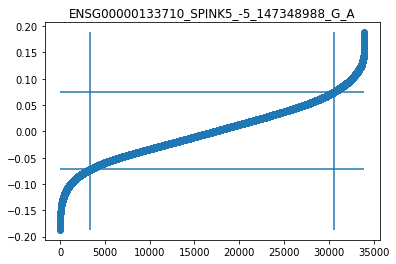

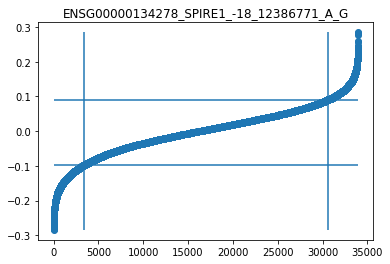

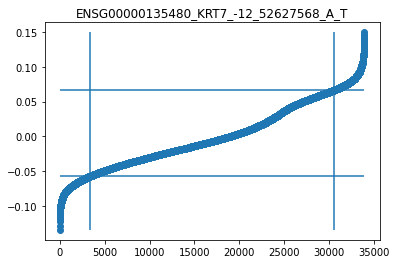

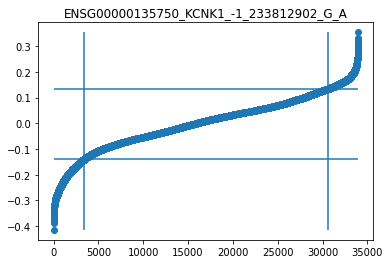

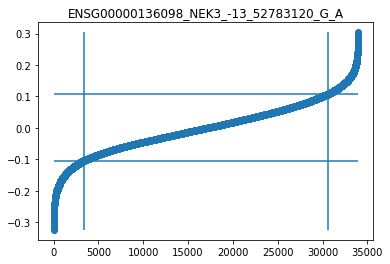

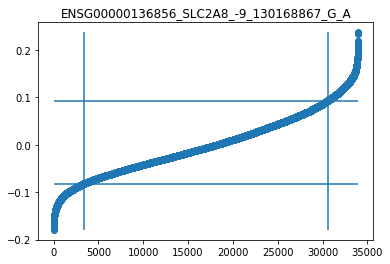

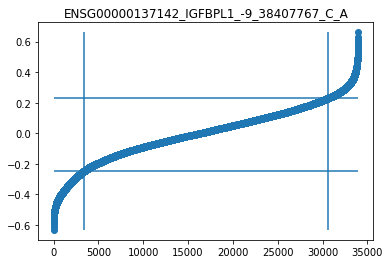

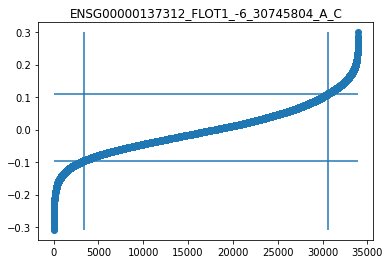

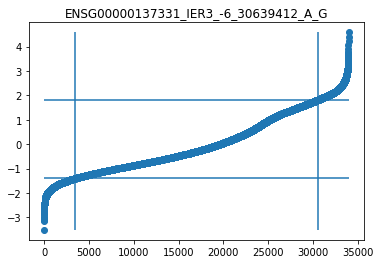

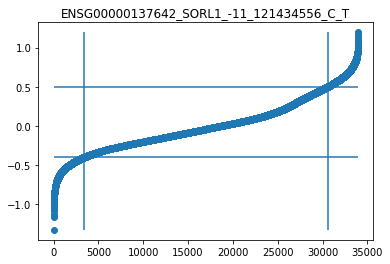

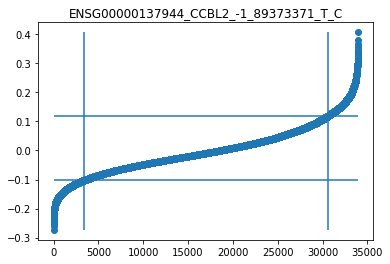

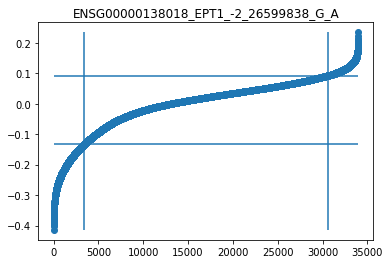

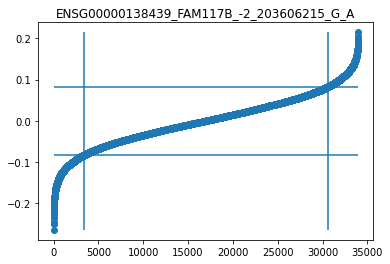

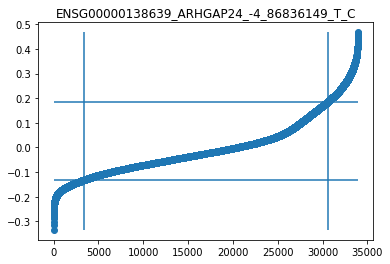

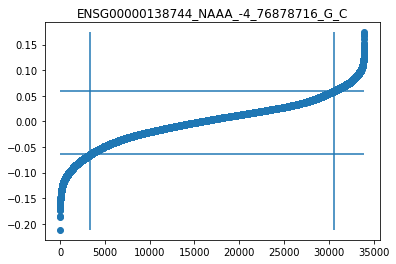

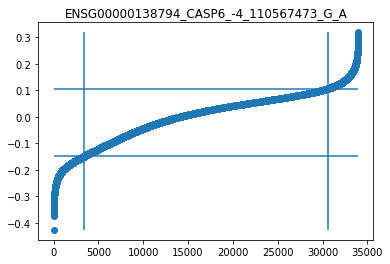

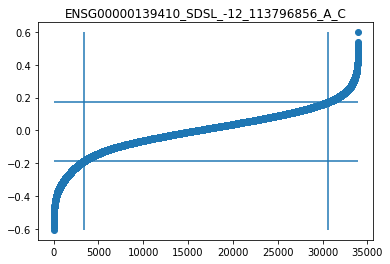

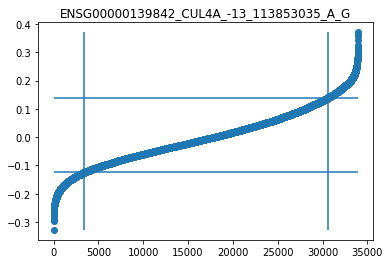

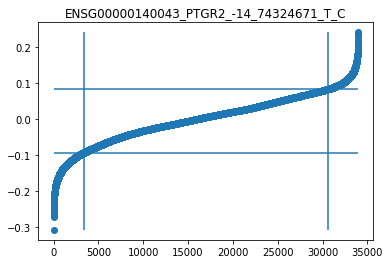

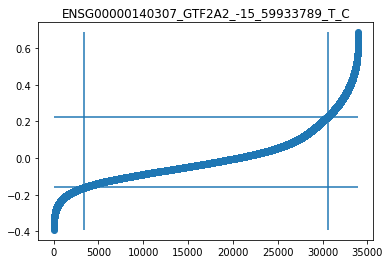

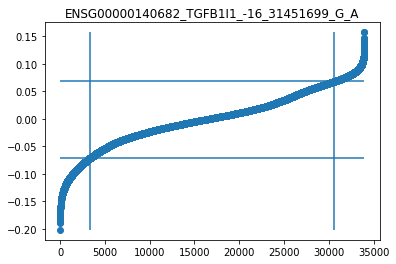

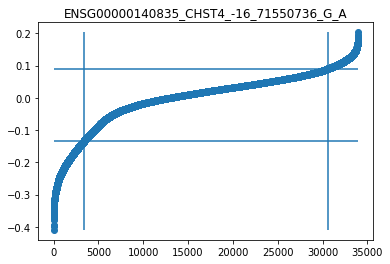

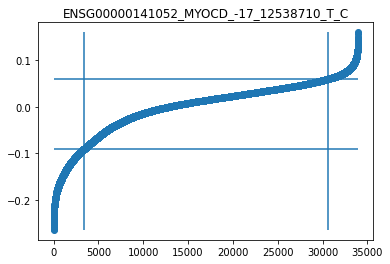

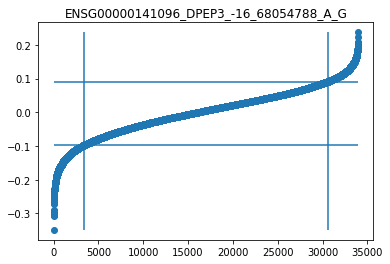

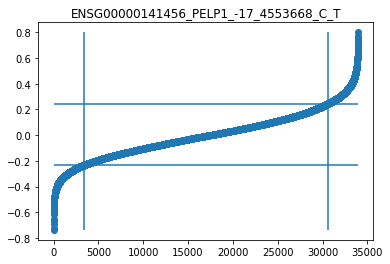

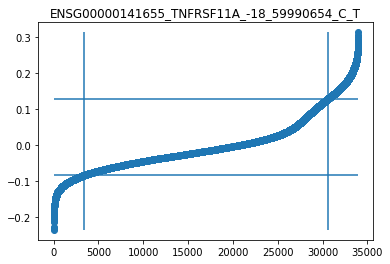

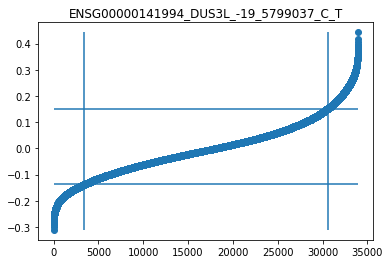

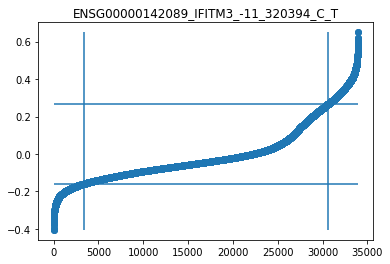

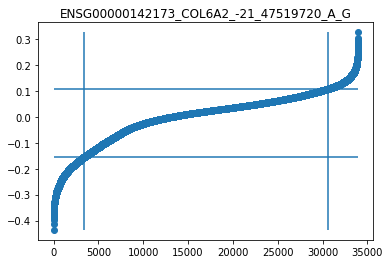

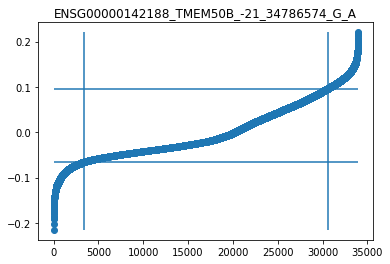

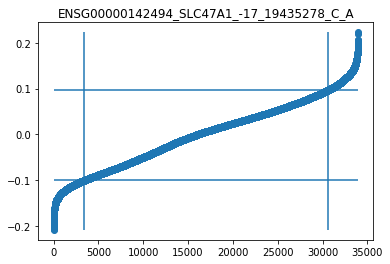

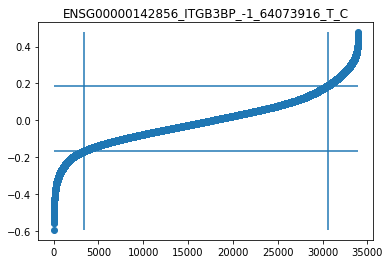

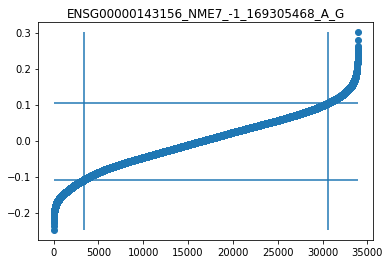

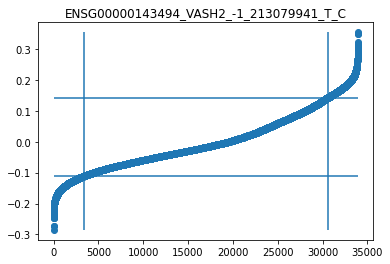

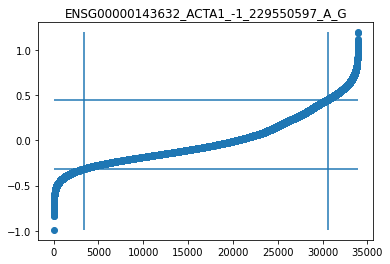

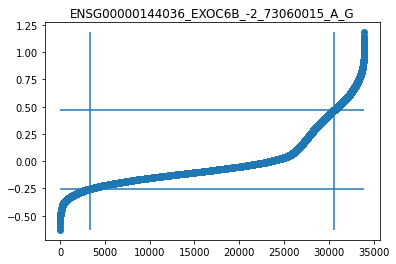

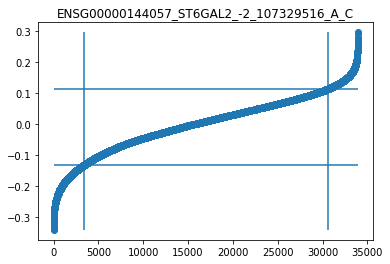

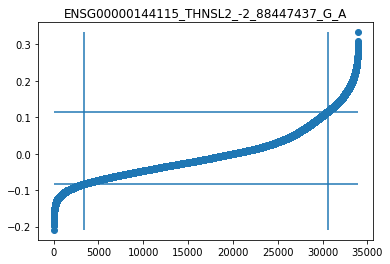

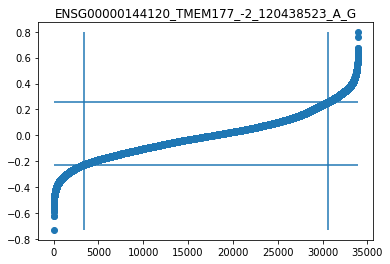

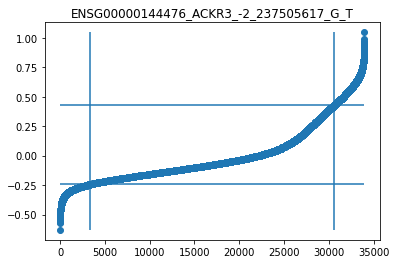

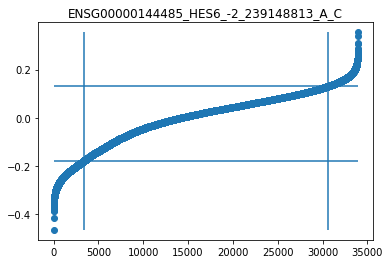

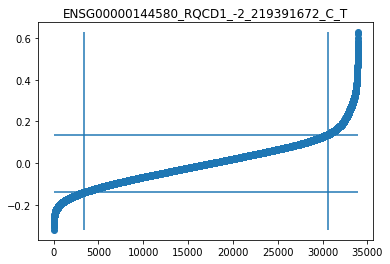

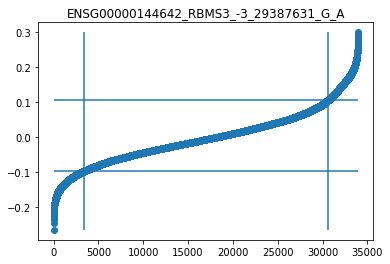

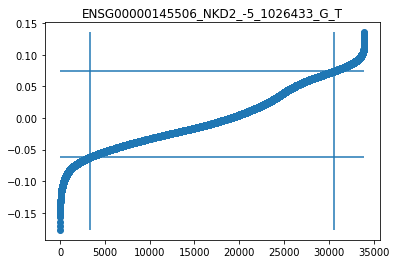

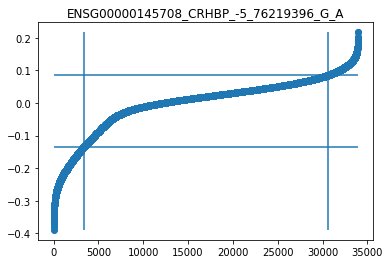

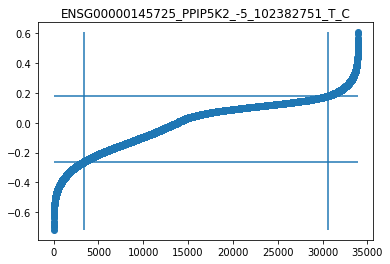

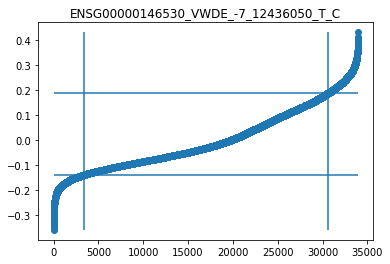

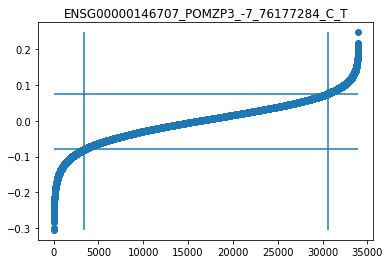

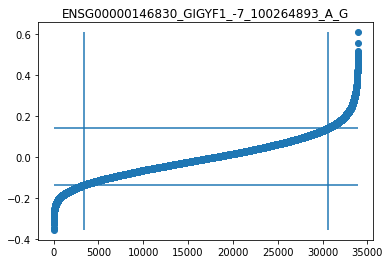

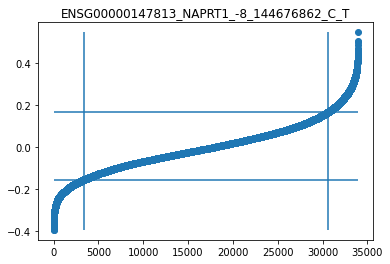

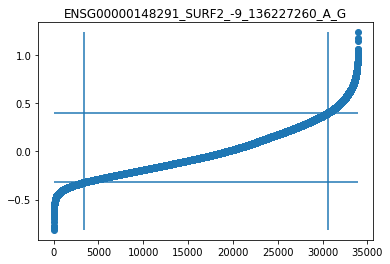

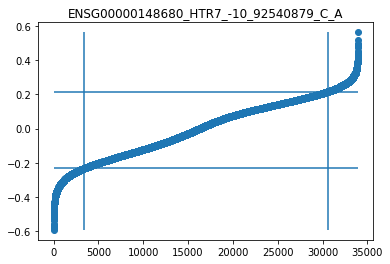

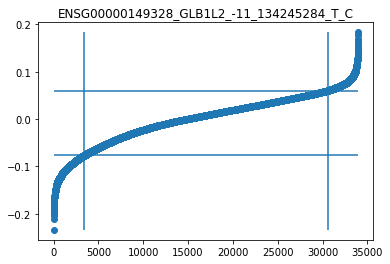

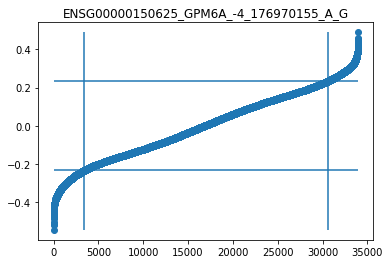

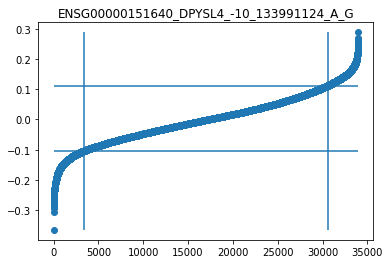

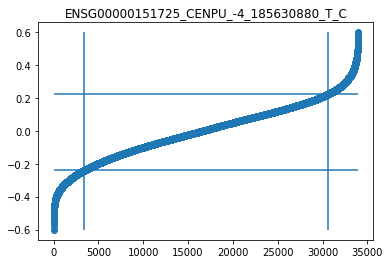

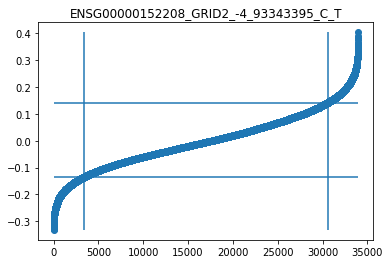

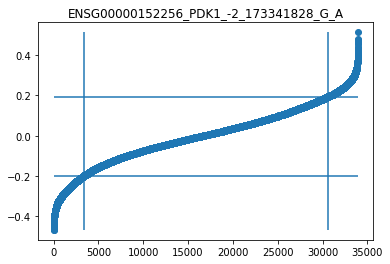

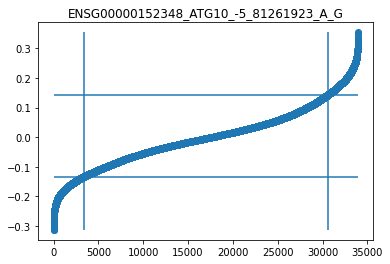

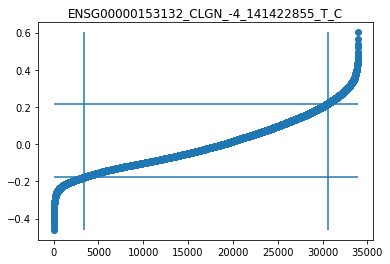

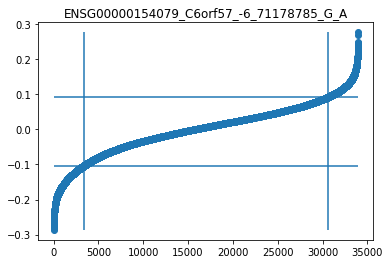

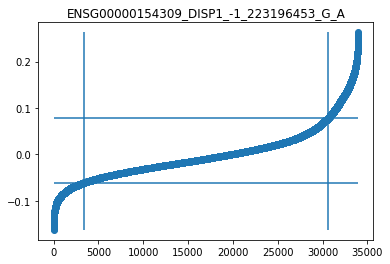

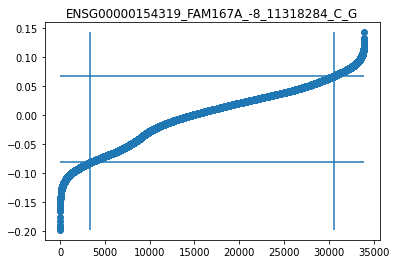

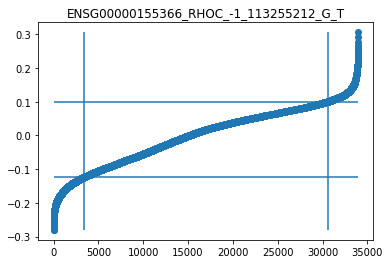

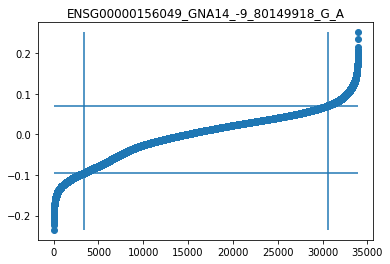

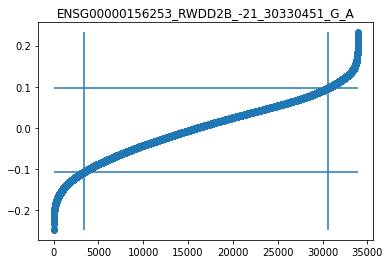

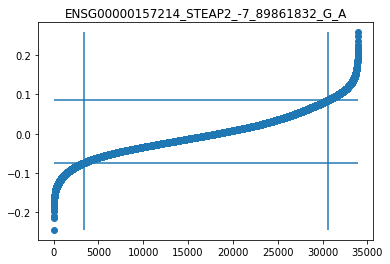

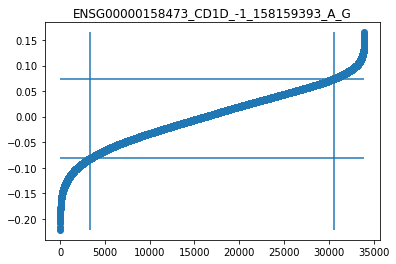

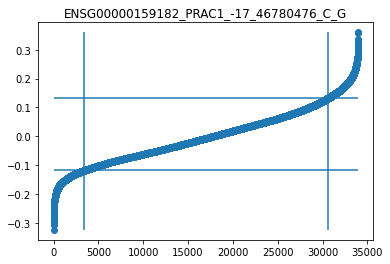

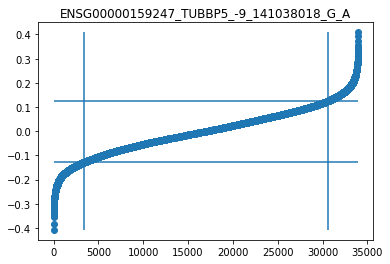

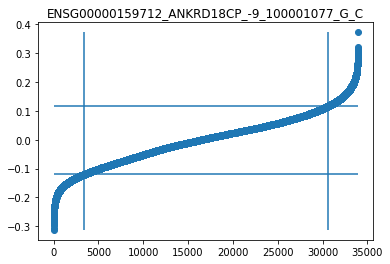

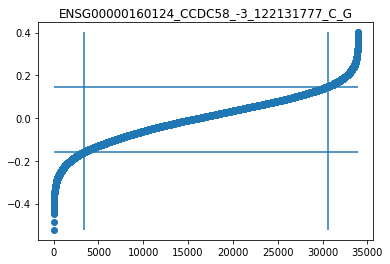

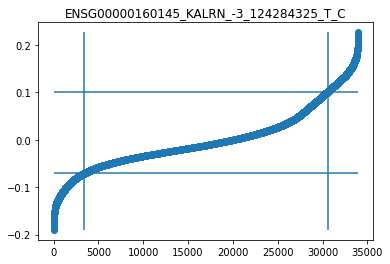

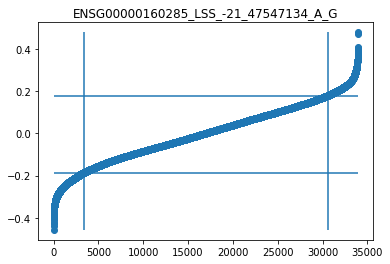

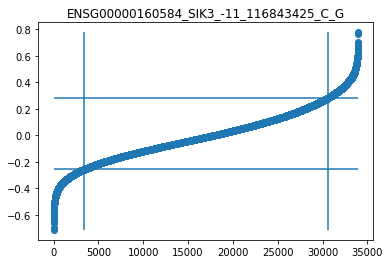

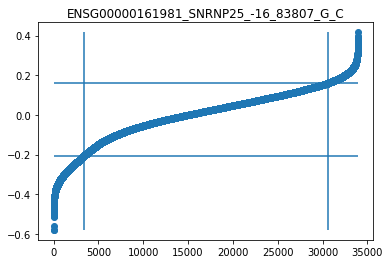

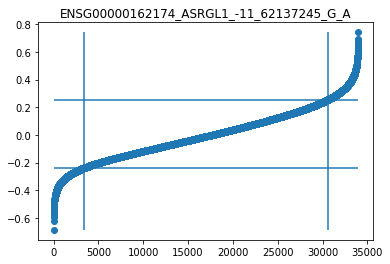

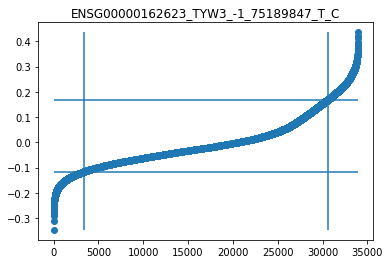

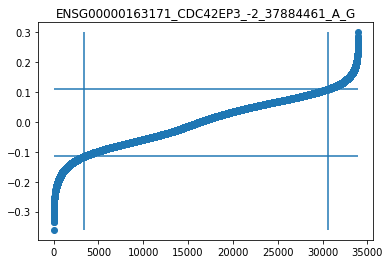

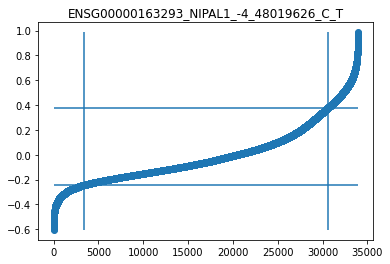

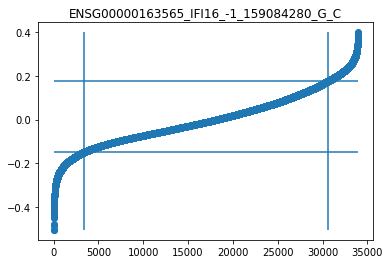

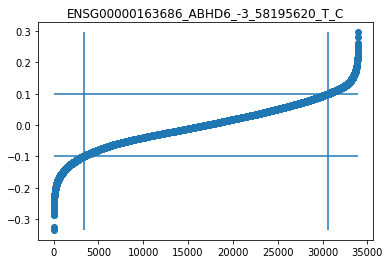

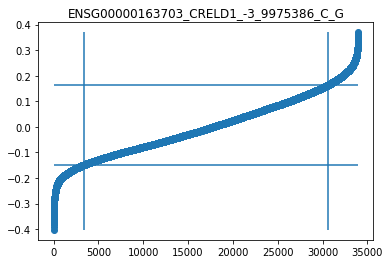

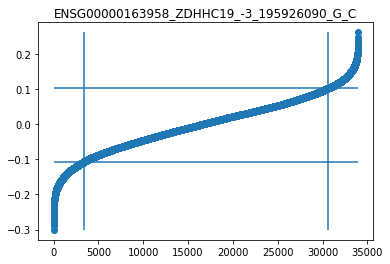

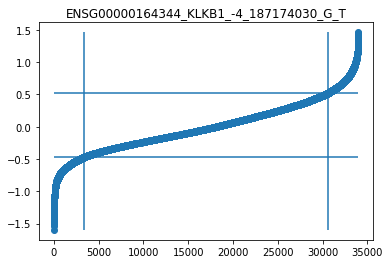

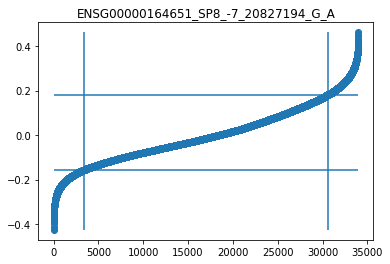

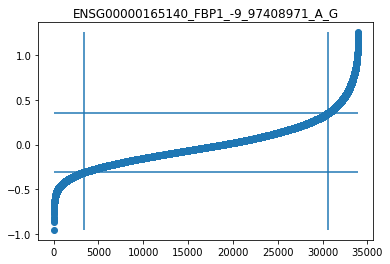

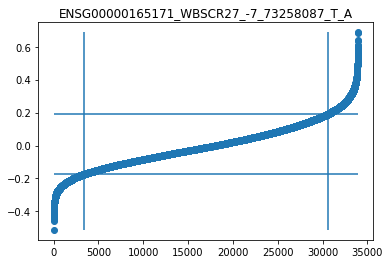

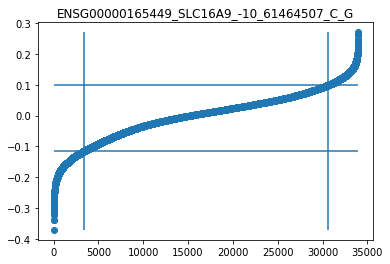

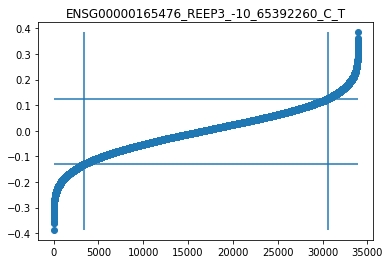

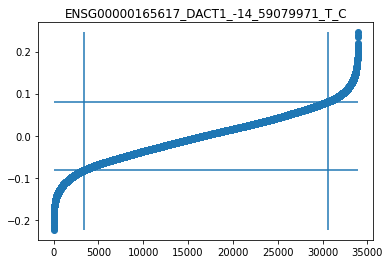

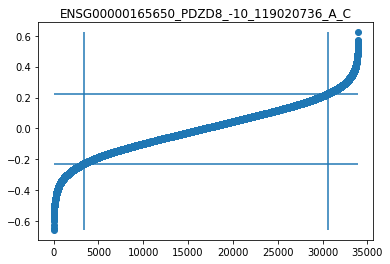

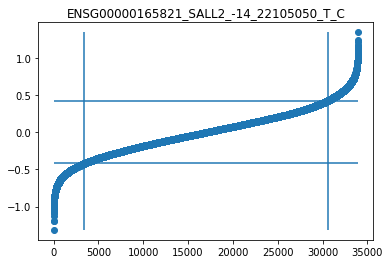

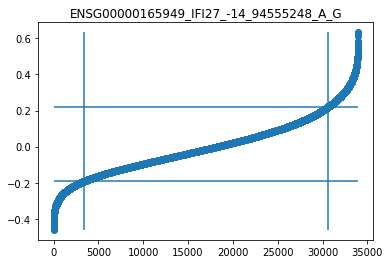

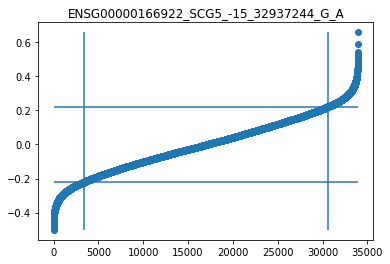

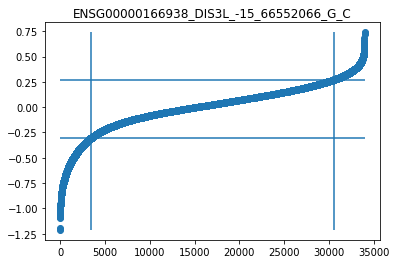

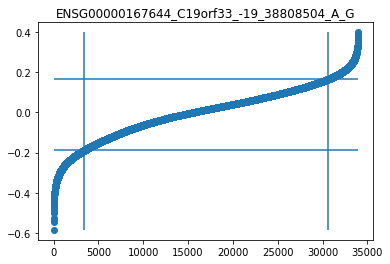

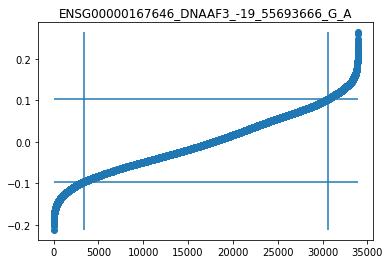

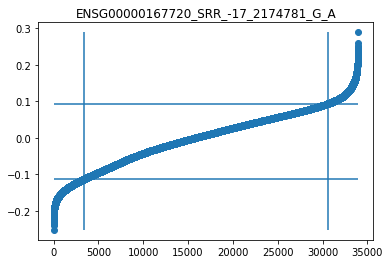

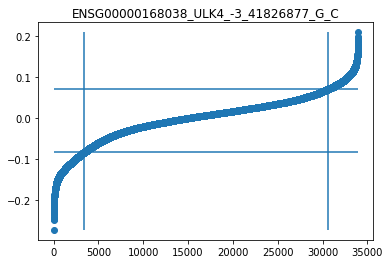

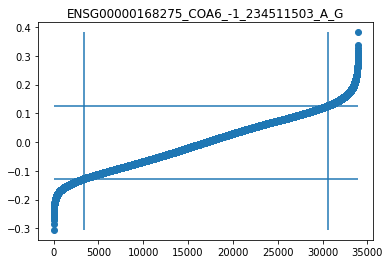

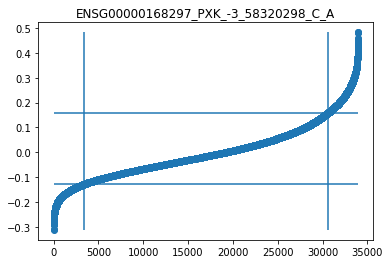

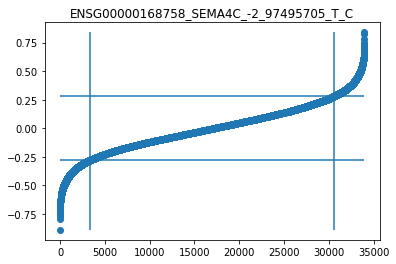

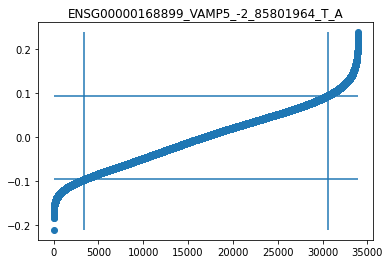

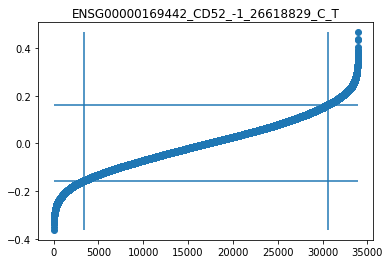

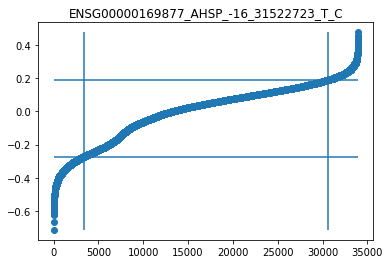

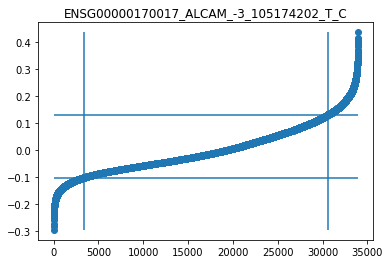

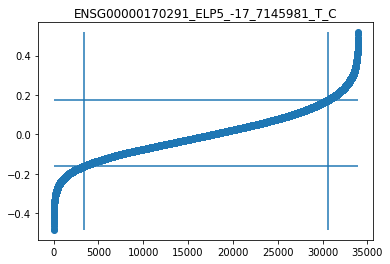

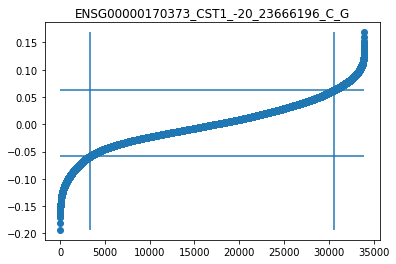

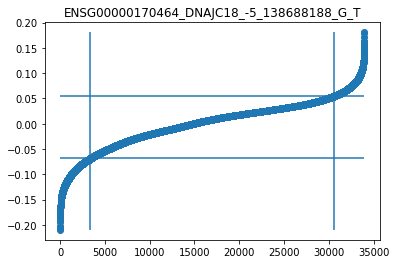

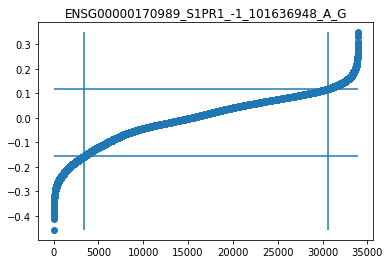

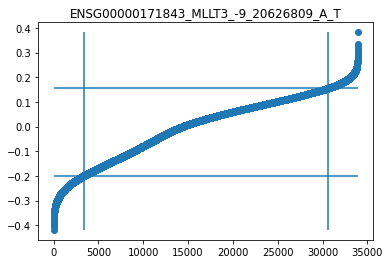

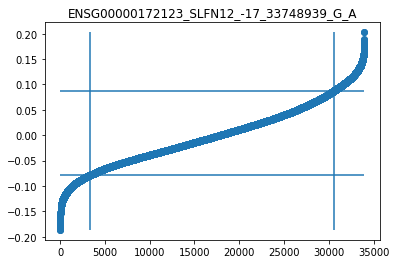

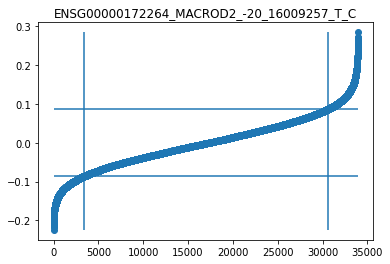

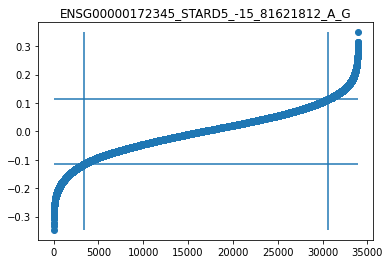

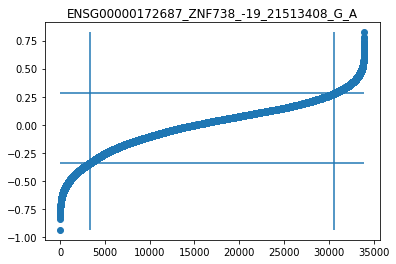

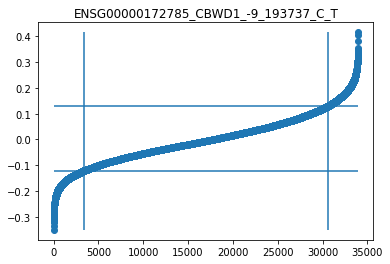

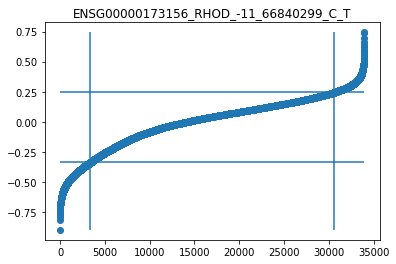

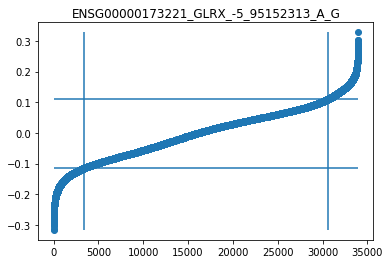

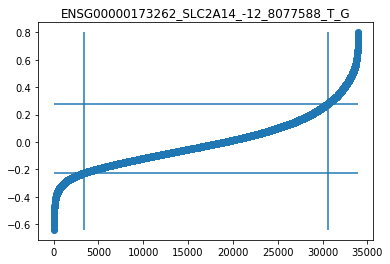

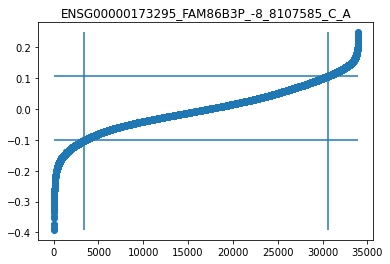

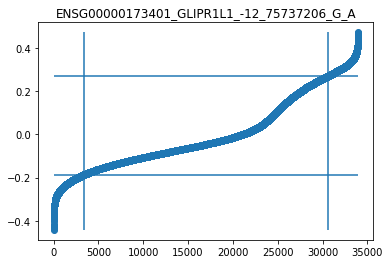

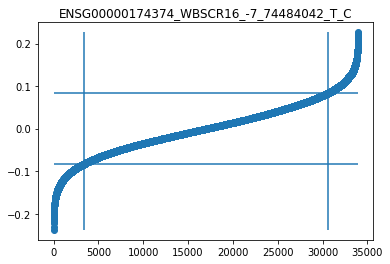

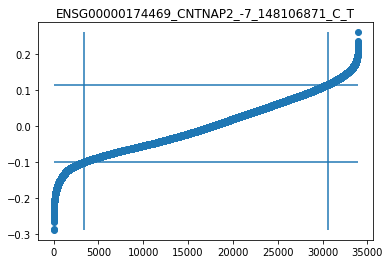

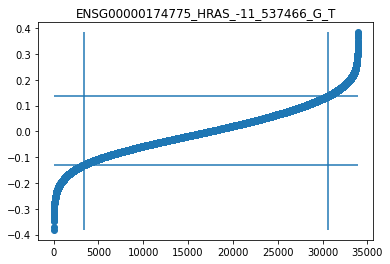

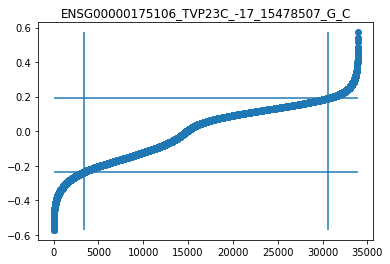

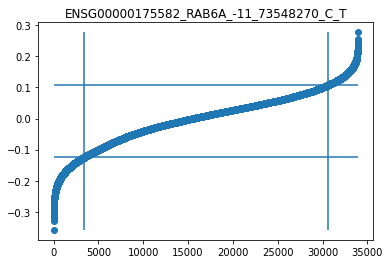

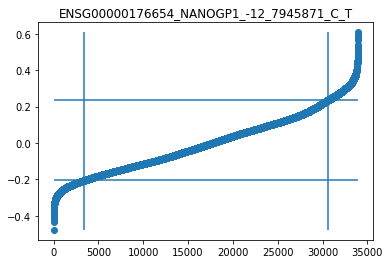

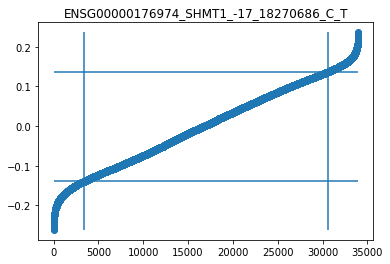

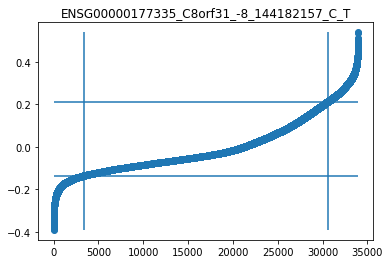

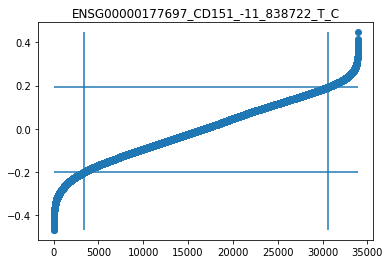

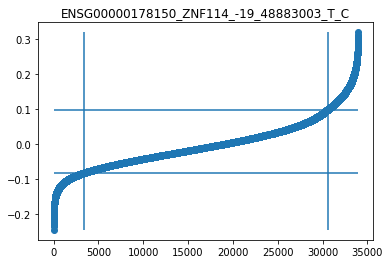

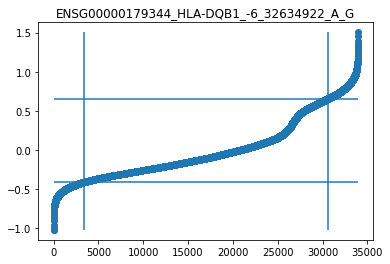

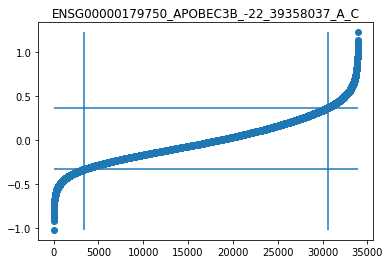

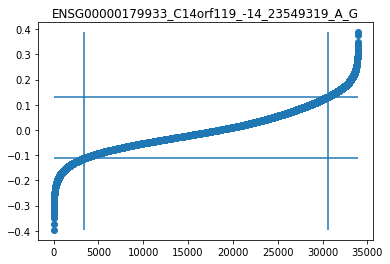

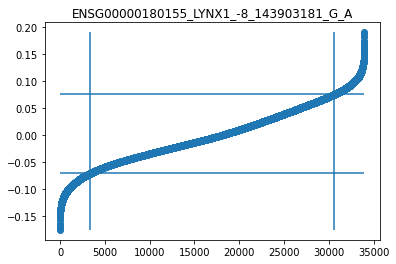

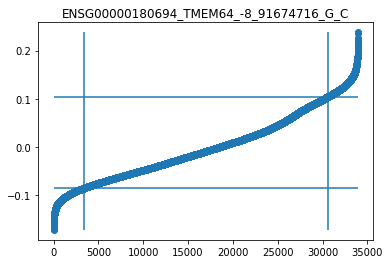

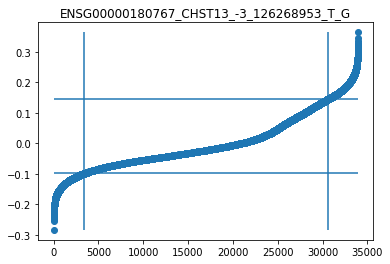

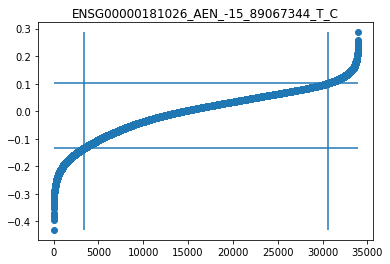

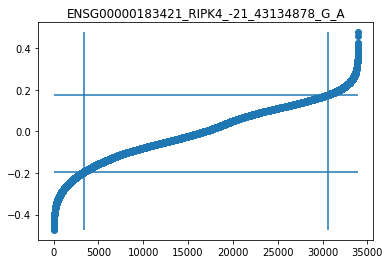

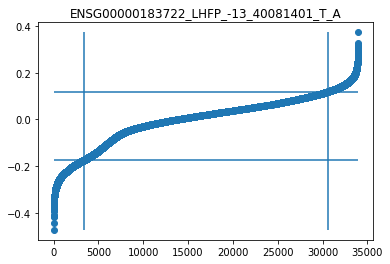

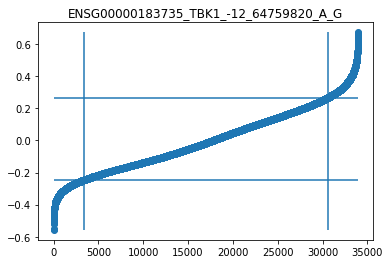

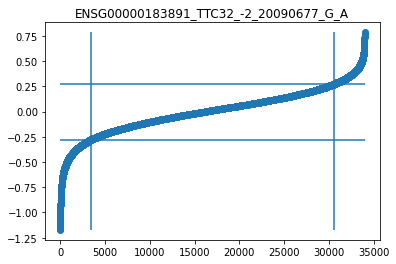

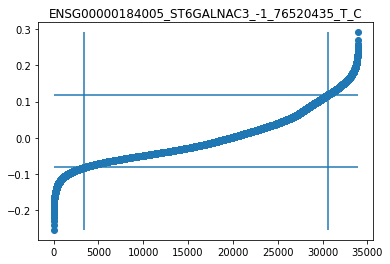

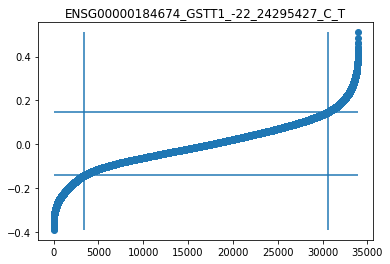

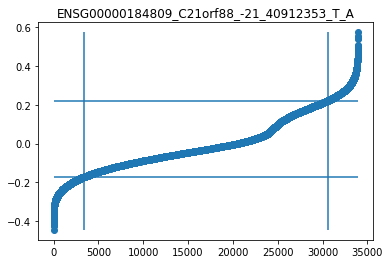

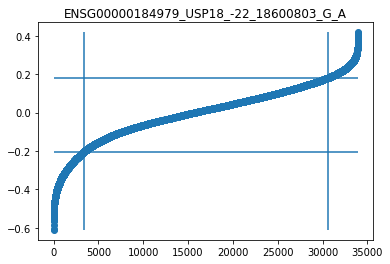

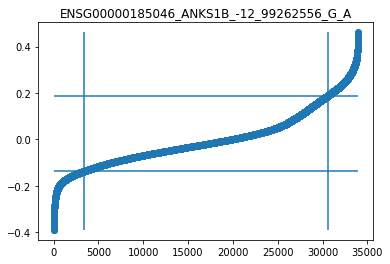

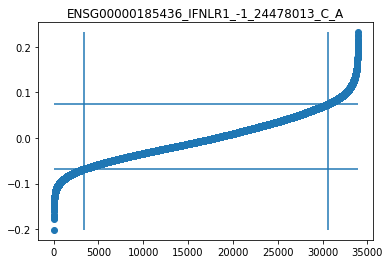

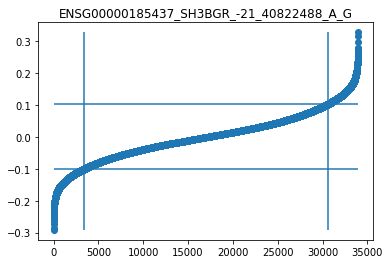

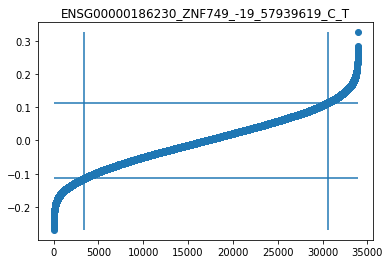

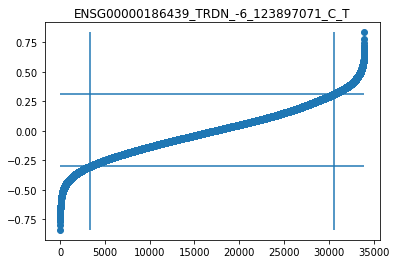

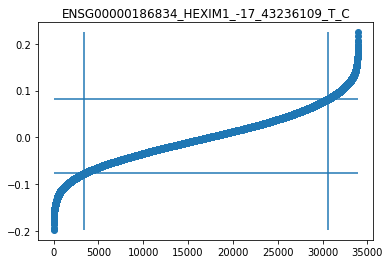

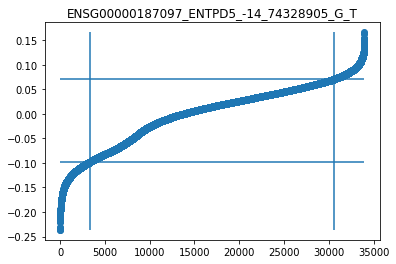

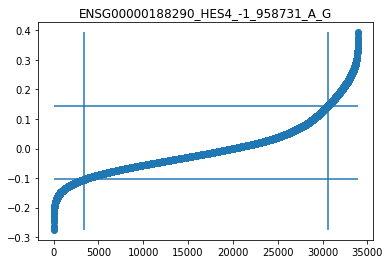

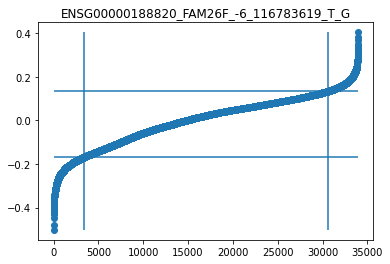

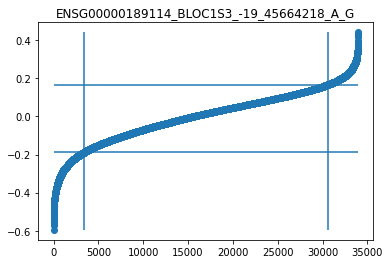

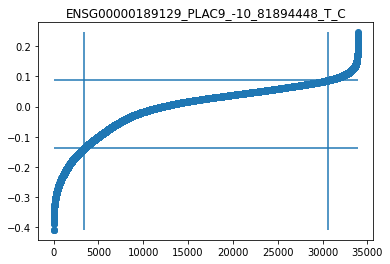

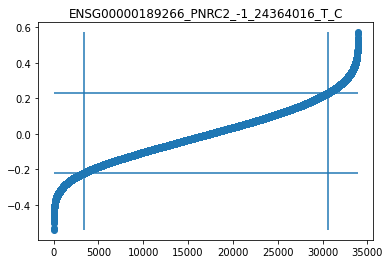

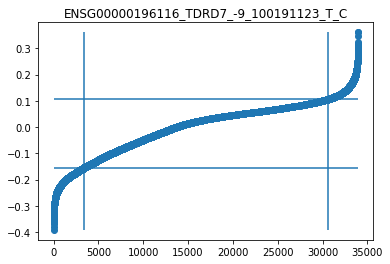

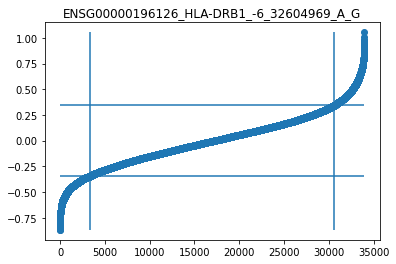

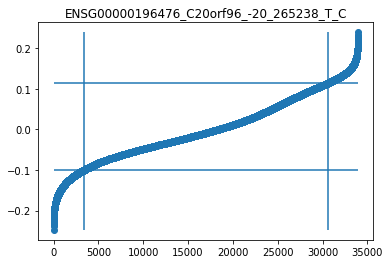

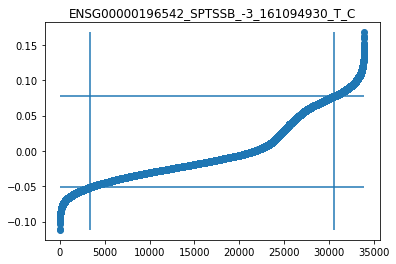

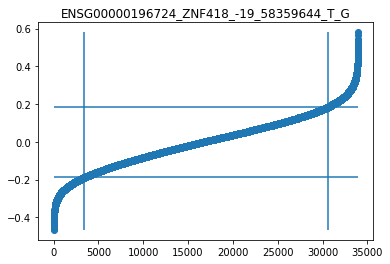

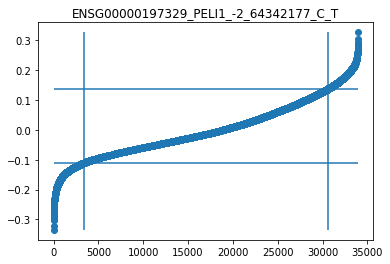

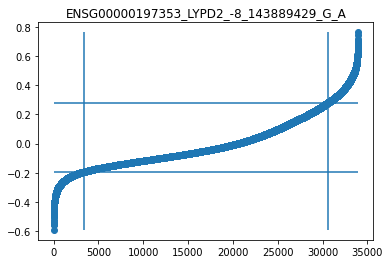

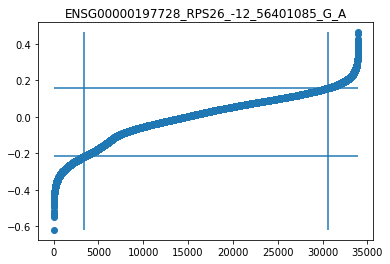

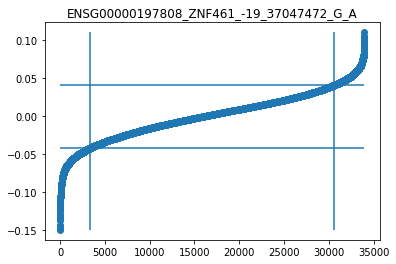

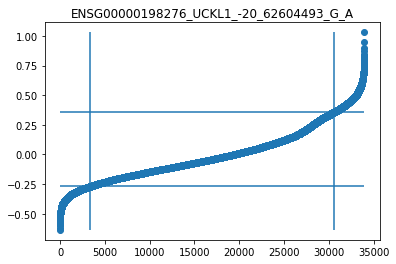

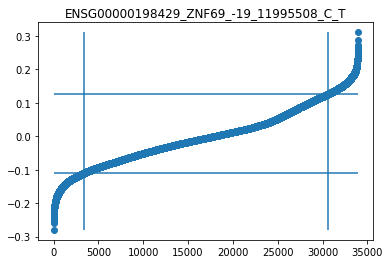

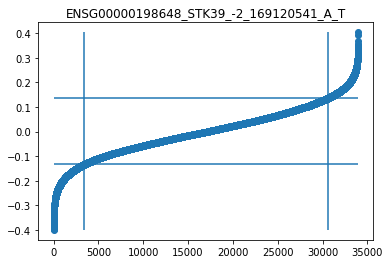

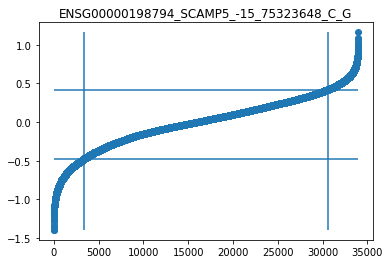

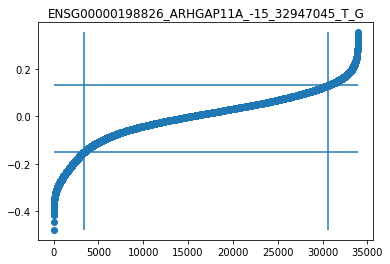

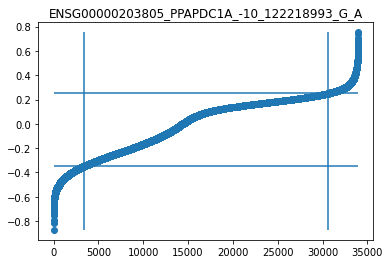

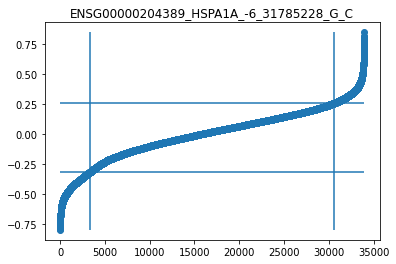

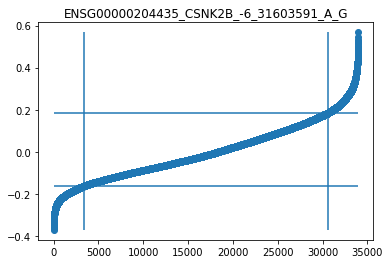

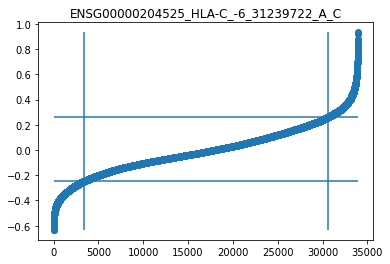

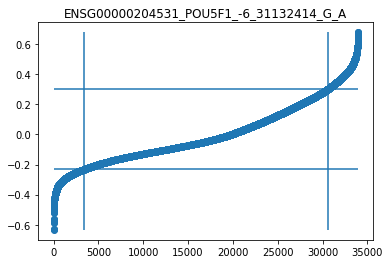

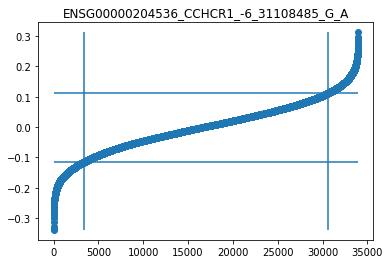

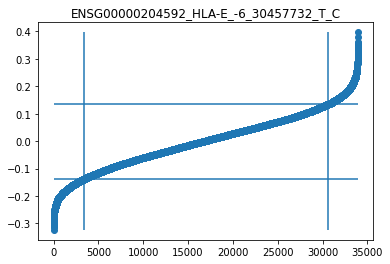

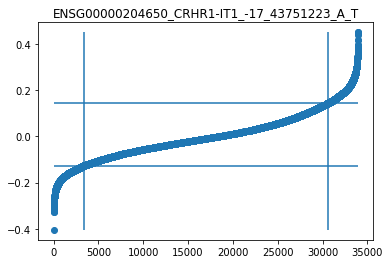

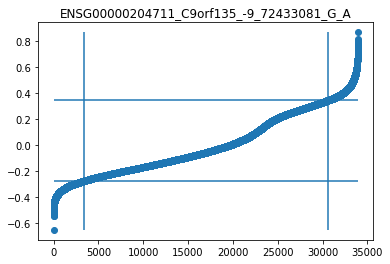

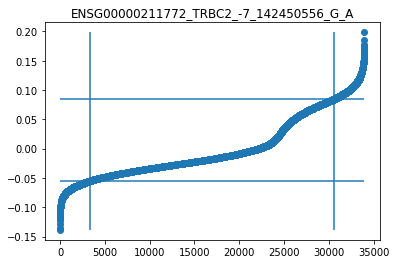

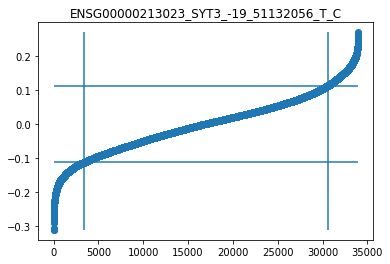

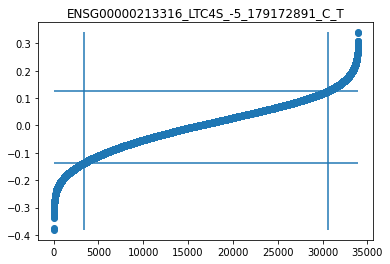

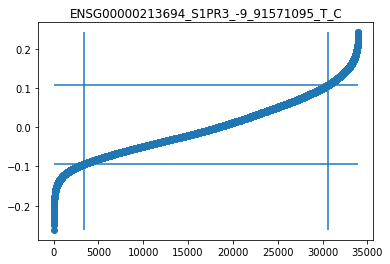

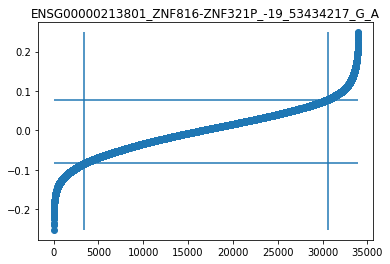

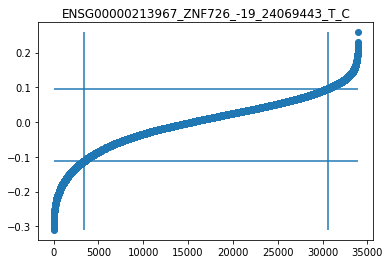

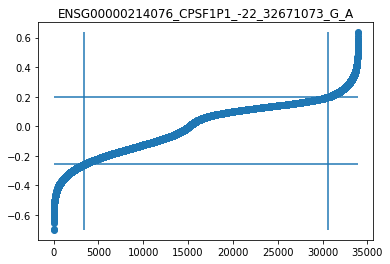

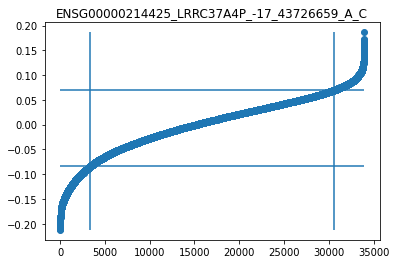

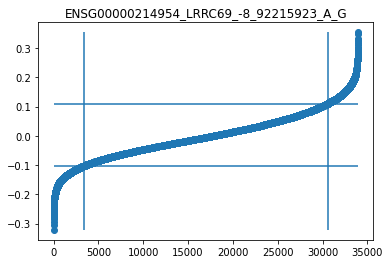

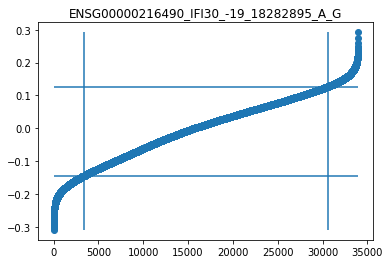

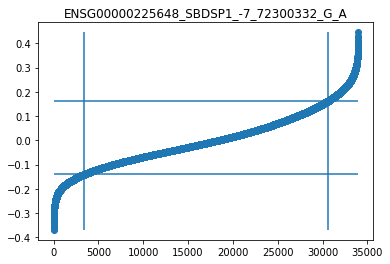

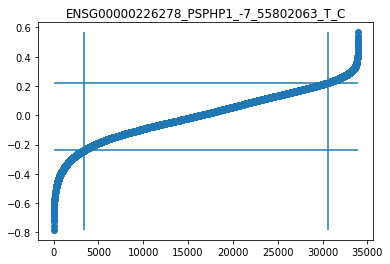

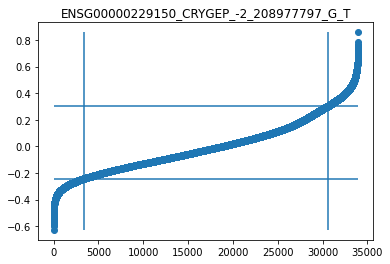

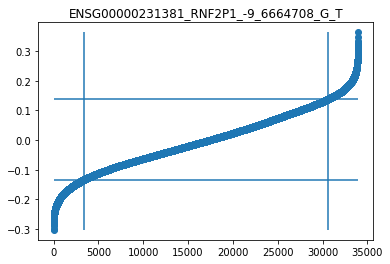

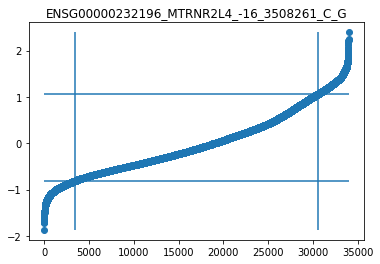

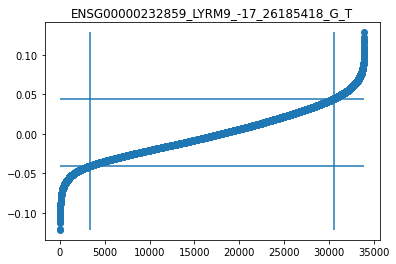

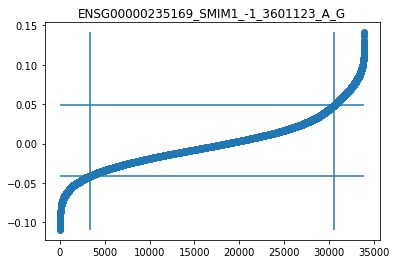

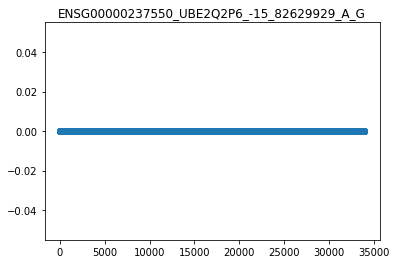

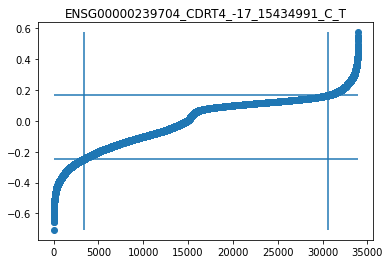

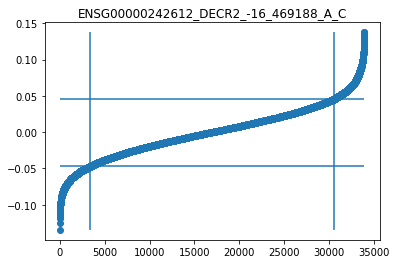

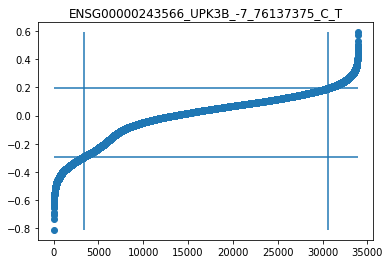

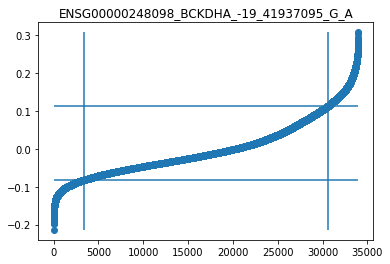

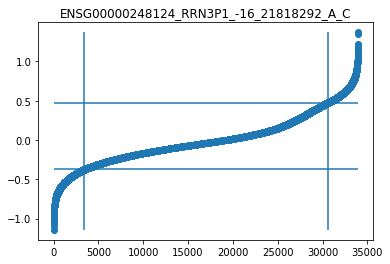

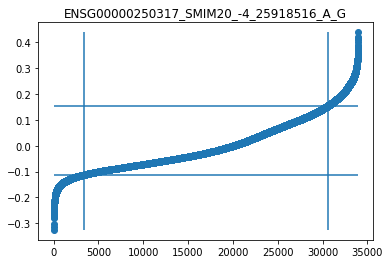

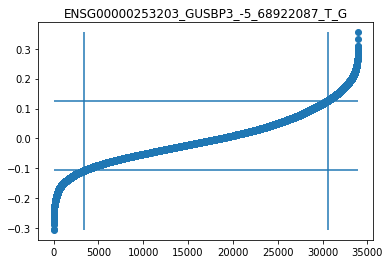

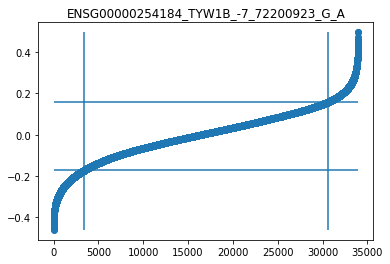

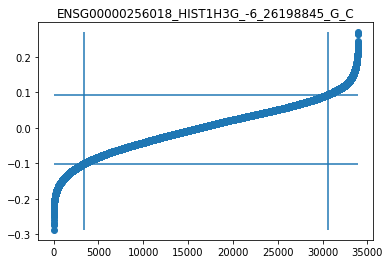

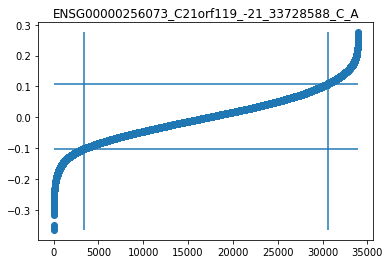

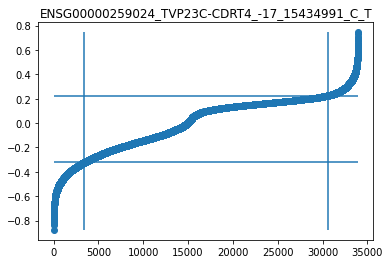

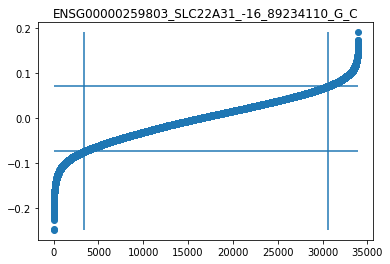

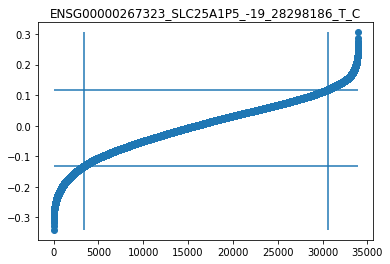

In [3]:
beta = np.array([])
for i in range(df.shape[1]):
# for i in range(5):
    # get single-cell effect sizes
    v = df.values[:,i]
    # get min and max
    ymin = min(v)
    ymax = max(v)
    # rank values
    order = v.argsort()
    y = v[order]
    x = range(len(v))
    plt.scatter(x,y)
    # define 10% of cells
    xx = ceil(0.1*len(v))
    plt.vlines(x=xx,ymin=ymin, ymax=ymax)
    plt.hlines(y=y[xx],xmin=0, xmax=len(v))
    plt.vlines(x=len(v)-xx,ymin=ymin, ymax=ymax)
    plt.hlines(y=y[len(v)-xx],xmin=0, xmax=len(v))
    # add title
    plt.title(df.columns.values[i])
    plt.show()
    beta = np.append(beta,y[len(v)-xx]-y[xx])

In [4]:
beta.shape
df.columns.values.shape

(322,)

In [5]:
d = np.concatenate([beta.reshape(beta.shape[0],1),df.columns.values.reshape(beta.shape[0],1)], axis=1)
df_beta = pd.DataFrame(data = d, columns = ["beta","eqtl"])
df_beta.head()

,beta,eqtl
0,0.151162,ENSG00000005059_CCDC109B_-4_110648632_T_A
1,0.195709,ENSG00000006016_CRLF1_-19_18735221_G_T
2,0.142675,ENSG00000006459_KDM7A_-7_139913409_G_A
3,0.598697,ENSG00000013297_CLDN11_-3_170402765_T_C
4,0.367702,ENSG00000021300_PLEKHB1_-11_73339784_G_A


In [6]:
# df_beta.to_csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/MOFA10/eqtl_est_single_GxE_genetic_effects.csv")

In [7]:
max(beta)

3.23074901934807

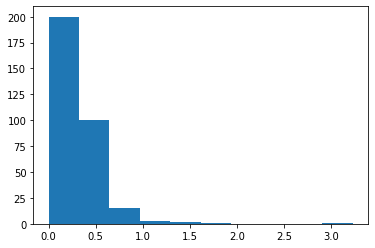

In [8]:
plt.hist(beta)
plt.show()

In [9]:
beta[beta.argsort()]

array([0.        , 0.08246628, 0.08506573, 0.08937465, 0.09269617,
       0.10591511, 0.1069625 , 0.11306047, 0.12009188, 0.12085807,
       0.12305566, 0.12335763, 0.1237011 , 0.12841774, 0.13249641,
       0.13560931, 0.13570766, 0.13691117, 0.13835433, 0.13875456,
       0.1387847 , 0.13971542, 0.13999332, 0.14193219, 0.14267454,
       0.14317374, 0.14490566, 0.14581218, 0.14712999, 0.14846184,
       0.15021247, 0.15116224, 0.15185313, 0.15319755, 0.15349792,
       0.15561409, 0.15581823, 0.15626453, 0.15856643, 0.15856701,
       0.15859634, 0.16061624, 0.16158197, 0.16186868, 0.16200089,
       0.16478902, 0.16533354, 0.16547669, 0.16575351, 0.16606755,
       0.1676371 , 0.168202  , 0.16839069, 0.16995221, 0.17201821,
       0.17205566, 0.17296535, 0.17489309, 0.17588549, 0.176367  ,
       0.17764174, 0.18001646, 0.18039829, 0.18297202, 0.18625119,
       0.18713735, 0.18759691, 0.18843713, 0.18925193, 0.1895181 ,
       0.19336165, 0.19369867, 0.19387804, 0.19434856, 0.19476

In [10]:
df_betas_sel = df_beta[df_beta["beta"]>1]
df_betas_sel

,beta,eqtl
30,1.424827,ENSG00000100058_CRYBB2P1_-22_25845855_C_G
84,1.328731,ENSG00000124693_HIST1H3B_-6_26020936_C_T
88,1.142909,ENSG00000125885_MCM8_-20_5915922_A_C
117,3.230749,ENSG00000137331_IER3_-6_30639412_A_G
241,1.064494,ENSG00000179344_HLA-DQB1_-6_32634922_A_G
305,1.879036,ENSG00000232196_MTRNR2L4_-16_3508261_C_G


In [11]:
eqtls = np.array(df_beta["eqtl"])
# eqtls

In [12]:
df = df.loc[:,eqtls]
df.shape

(33964, 322)

In [13]:
### MOFA
pcs_filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/mofa_logcounts_model_factors.csv"
df_pcs = pd.read_csv(pcs_filename, index_col=0)
df_pcs.head()
# df_pcs.index

,MOFA1,MOFA2,MOFA3,MOFA4,MOFA5,MOFA6,MOFA7,MOFA8,MOFA9,MOFA10,MOFA11,MOFA12,MOFA13,MOFA14,MOFA15,MOFA16,MOFA17,MOFA18,MOFA19,MOFA20
21843_1#10,-0.597704,1.067436,0.056496,1.347661,0.640743,0.337826,-0.466419,0.015208,0.292243,-0.632737,-0.583318,0.473121,0.454845,-0.991047,0.906530,-0.786617,0.445996,-1.810175,-1.039795,0.268045
21843_1#100,0.233285,2.137884,0.646811,1.129460,-0.352773,-0.091806,0.924137,-0.373492,1.789593,-0.659233,0.462286,-0.138813,-2.220937,1.554073,-1.517363,-0.350251,-0.165591,1.199816,0.729859,0.048444
21843_1#101,-0.054712,1.786031,-0.099625,0.364118,0.057125,0.215032,0.242728,0.075943,0.879961,0.680635,0.372930,0.268620,-2.024130,1.150452,-0.054901,-0.459422,0.421497,1.172856,0.729108,-0.124239
21843_1#102,-0.730924,1.132253,0.195645,0.588264,1.548193,0.251288,-0.399754,-0.210800,0.115147,0.060057,-0.584682,-0.421879,-0.127777,0.157820,0.735246,-1.818381,-0.148435,-0.168095,-0.770380,1.124324
21843_1#103,-0.257399,1.515610,-0.154816,0.199532,0.719182,-0.296087,-0.426952,-0.229939,0.091292,-0.430566,-0.473848,-1.243472,-0.852861,-0.064272,0.321025,-0.666393,0.455624,-0.410516,-0.600952,0.304595


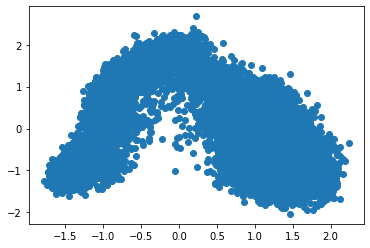

In [14]:
plt.scatter(df_pcs.values[:,0],df_pcs.values[:,1])
plt.show()

In [15]:
## consider only shared cells

In [16]:
all_cells = df_pcs.index.values

In [269]:
## sample 50% of cells

In [17]:
cells = sample(list(all_cells), k = ceil(len(all_cells)*0.5))
cells = sorted(set(list(df.index.values)).intersection(cells))

In [18]:
df = df[df.index.isin(cells)]
df.shape

(16972, 322)

In [19]:
df_pcs = df_pcs[df_pcs.index.isin(cells)]
df_pcs.shape

(16972, 20)

In [20]:
# sort to ensure cells are in the same order
df = df.sort_index(axis=0)
df_pcs = df_pcs.sort_index(axis=0)

In [21]:
# scale values
mat = minmax_scale(df)
df = pd.DataFrame(data = mat, index = df.index, columns = df.columns)

In [22]:
df.head()

,ENSG00000005059_CCDC109B_-4_110648632_T_A,ENSG00000006016_CRLF1_-19_18735221_G_T,ENSG00000006459_KDM7A_-7_139913409_G_A,ENSG00000013297_CLDN11_-3_170402765_T_C,ENSG00000021300_PLEKHB1_-11_73339784_G_A,ENSG00000029639_TFB1M_-6_155635808_C_G,ENSG00000033178_UBA6_-4_68480525_C_T,ENSG00000035115_SH3YL1_-2_256116_G_T,ENSG00000059377_TBXAS1_-7_139547370_G_A,ENSG00000063761_ADCK1_-14_78311319_G_A,...,ENSG00000248098_BCKDHA_-19_41937095_G_A,ENSG00000248124_RRN3P1_-16_21818292_A_C,ENSG00000250317_SMIM20_-4_25918516_A_G,ENSG00000253203_GUSBP3_-5_68922087_T_G,ENSG00000254184_TYW1B_-7_72200923_G_A,ENSG00000256018_HIST1H3G_-6_26198845_G_C,ENSG00000256073_C21orf119_-21_33728588_C_A,ENSG00000259024_TVP23C-CDRT4_-17_15434991_C_T,ENSG00000259803_SLC22A31_-16_89234110_G_C,ENSG00000267323_SLC25A1P5_-19_28298186_T_C
21241_6#10,0.558383,0.335064,0.545478,0.185038,0.358048,0.529913,0.617228,0.660561,0.551282,0.478272,...,0.451620,0.286219,0.500410,0.740438,0.293353,0.235945,0.389296,0.375676,0.382570,0.326172
21241_6#100,0.393914,0.469017,0.483044,0.304276,0.392750,0.442269,0.602402,0.562760,0.556746,0.567709,...,0.337168,0.287612,0.379726,0.627550,0.393506,0.266048,0.327877,0.466582,0.299784,0.339662
21241_6#104,0.510720,0.510432,0.544640,0.202453,0.280496,0.541888,0.584221,0.737022,0.385867,0.440649,...,0.489151,0.203162,0.491414,0.673972,0.435199,0.356666,0.370840,0.337779,0.337591,0.381041
21241_6#105,0.407418,0.425417,0.495350,0.429228,0.446505,0.434430,0.545701,0.440814,0.633050,0.556910,...,0.279861,0.322502,0.334332,0.538376,0.447383,0.196947,0.462071,0.539528,0.383817,0.398044
21241_6#106,0.196544,0.837491,0.578520,0.423754,0.604899,0.294994,0.332238,0.536168,0.297246,0.690253,...,0.339457,0.354999,0.234487,0.594694,0.622606,0.515527,0.518296,0.483805,0.370663,0.445093


In [23]:
### save scaled data

In [24]:
# delect columns that are only 0s
df = df.loc[:, (df != 0).any(axis=0)]

In [25]:
### build "fake" AnnData file
#
# counts: single-cell eQTL effects
# adata.obsm['spatial']: coordinates (PCA, UMAP..)

In [26]:
# obs i.e. cells
obs_names = df.index.values
obs = pd.DataFrame(index=obs_names)
# obs
n_obs = len(obs)
n_obs

16972

In [27]:
# vars i.e. genes (or in this case gene-SNP pairs)
var_names = df.columns.values
var = pd.DataFrame(index=var_names)
# var
n_vars = len(var)
n_vars

321

In [28]:
X = df.to_numpy()
X.shape
type(X)

numpy.ndarray

In [29]:
adata = ad.AnnData(X=X, obs=obs, var=var, dtype='float')
adata

AnnData object with n_obs × n_vars = 16972 × 321

In [30]:
## add PCs as "spatial" coordinates
adata.obsm['spatial'] = df_pcs
adata.obsm['spatial'].shape

(16972, 20)

In [31]:
adata

AnnData object with n_obs × n_vars = 16972 × 321
    obsm: 'spatial'

In [ ]:
sp = spatial_patterns(adata, normalized = True, params=SpatialPatternParameters(lengthscales=5))

In [ ]:
d = np.concatenate([sp[0].labels.reshape(len(sp[0].labels),1),
                    adata.var.index.to_numpy().reshape(len(sp[0].labels),1)], axis=1)
df_labels = pd.DataFrame(data = d, columns = ["label","gene"])
df_labels.head()

In [ ]:
df_pp = pd.DataFrame(data = sp[0].pattern_probabilities, columns = ["pp"+str(i) for i in np.arange(len(np.unique(sp[0].labels)))])
df_pp.head()

In [ ]:
df_cluster_summaries = pd.DataFrame(data = sp[0].patterns, index=df_pcs.index)
df_cluster_summaries.head()
# df_cluster_summaries.shape

In [ ]:
df_cluster_summaries.to_csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/scaled_absolute_eff_sizes_20mofas_as_spatial_downsample_50pct_cluster_summaries.csv")

In [ ]:
df_clusters = pd.concat([df_labels, df_pp], axis = 1)
df_clusters.head()

In [ ]:
df_clusters.to_csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/scaled_absolute_eff_sizes_20mofas_as_spatial_downsample_50pct_cluster_labels.csv")

In [ ]:
# df_clusters[df_clusters["gene"]=="ENSG00000137331_IER3-6_30639412_A_G"]

In [ ]:
for i in np.arange(sp[0].patterns.shape[1]):
    plt.scatter(df_pcs.values[:,0],df_pcs.values[:,1], c = sp[0].patterns[:,i])
    plt.title("cluster "+str(i)+", n="+str(df_clusters[df_clusters["label"] == i].shape[0]))
    plt.show()

In [ ]:
for i in np.arange(sp[0].patterns.shape[1]):
    plt.scatter(df_pcs.values[:,0],df_pcs.values[:,6], c = sp[0].patterns[:,i])
    plt.title("cluster "+str(i)+", n="+str(df_clusters[df_clusters["label"] == i].shape[0]))
    plt.show()